[Nhóm 2 - Github link](https://github.com/kolee1902/APP_Changing_Image_Background_UNET)

Thành viên NHÓM 2:

- 21127129 - Lê Nguyễn Kiều Oanh  
- 21127104 - Đoàn Ngọc Mai  


# **CSC14116 - Changing image background using UNET**

## **Framework Project**

---

### 📌 1. Giới thiệu

Trong lĩnh vực xử lý ảnh, đặc biệt là bài toán **phân đoạn ảnh (image segmentation)**, việc tách tiền cảnh (foreground) khỏi hậu cảnh (background) là một bước quan trọng. Kiến trúc **U-Net**, được giới thiệu lần đầu trong lĩnh vực ảnh sinh học, đã chứng minh hiệu quả vượt trội cho các bài toán segmentation mà không cần một lượng lớn dữ liệu huấn luyện.

---

### 🧠 2. Kiến trúc U-Net

Kiến trúc U-Net gồm ba thành phần chính:

* **Encoder (Contracting Path)**: Trích xuất đặc trưng với các lớp tích chập (convolution) và giảm kích thước (max pooling).
* **Decoder (Expanding Path)**: Tăng kích thước ảnh đầu ra bằng các lớp up-convolution (deconvolution) để tái tạo lại phân vùng ảnh.
* **Skip Connections**: Giúp giữ lại thông tin chi tiết (ví dụ: biên ảnh) bằng cách kết nối trực tiếp encoder với decoder tại các tầng tương ứng.
* **1x1 Convolution cuối cùng**: Dự đoán phân lớp trên từng pixel.

```
Encoder (↓):        Input -> Conv -> ReLU -> Conv -> ReLU -> MaxPool
Decoder (↑):        UpConv -> Concatenate (skip) -> Conv -> ReLU -> Conv -> ReLU
```

#### 🔧 Cấu trúc tổng quát


![Ảnh minh hoạ](https://media.geeksforgeeks.org/wp-content/uploads/20220614121231/Group14.jpg)


---

#### 🧱 Kiến trúc chi tiết

| Thành phần     | Chi tiết                                          |
| -------------- | ------------------------------------------------- |
| Conv layers    | 3x3 padding + ReLU                                |
| MaxPooling     | 2x2                                               |
| Up-convolution | 2x2                                               |
| Output layer   | 1x1 convolution để dự đoán phân lớp tại mỗi pixel |

U-Net sử dụng **data augmentation mạnh mẽ** (flip, rotation, shift, elastic deformation) để tạo ra nhiều mẫu từ ảnh gốc – điều này giúp giải quyết vấn đề thiếu dữ liệu.

---

### 🛠️ 3. Ứng dụng U-Net cho Project Change Background

#### 🎯 Mục tiêu

Sử dụng U-Net để **tách lớp foreground (người, vật thể chính)** khỏi ảnh, sau đó **thay thế background** bằng một ảnh mới.

---

#### 🔧 Framework tổng quan

---

#### 🚶‍♂️ Bước 1: Chuẩn bị Dữ liệu

* **Input**: Hình ảnh RGB chứa người hoặc vật thể chính cần giữ lại.
* **Resize** ảnh về kích thước cố định (thường là `256x256`).
* **Normalize** pixel trong khoảng `[0, 1]`.

---

#### 🧠 Bước 2: Dự đoán Mask bằng U-Net

* Mô hình U-Net được **load từ trọng số đã huấn luyện** hoặc **huấn luyện lại** từ đầu (nếu dữ liệu đủ).
* Output là một **binary mask**, nơi `1` tương ứng với foreground (người), `0` là background.

---

#### 🧪 Bước 3: Hậu xử lý Mask

* **Làm mịn mask** bằng các kỹ thuật như:

  * Morphological operation (erosion/dilation)
  * Gaussian blur
  * Thresholding

> Mục đích: Tăng độ chính xác biên và giảm nhiễu.

---

#### ✂️ Bước 4: Tách foreground

Sử dụng mask để giữ lại vùng foreground:

```python
result = input_image * mask[..., np.newaxis]
```

---

#### 🌄 Bước 5: Chèn nền mới

* Load ảnh nền mới (có cùng kích thước).
* Áp dụng công thức:

```python
output = result + background * (1 - mask[..., np.newaxis])
```

* Kết quả là một ảnh mới với foreground giữ nguyên và background đã thay đổi.

---

### 🧪 4. Đánh giá

Nhóm chạy cùng một mô hình với dữ liệu đầu vào giống nhau cho cả phiên bản tuần tự và phiên bản song song (dùng multiprocessing). Sau đó, nhóm so sánh độ chính xác (accuracy) của hai mô hình.

Ngoài ra, nhóm có thể sử dụng các tiêu chí đánh giá phổ biến:

| Chỉ số             | Giải thích                                          |
| ------------------ | --------------------------------------------------- |
| **IoU**            | Mức độ chồng lấp giữa mask dự đoán và ground truth  |
| **Dice Score**     | Tỷ lệ chính xác giữa vùng foreground được phân đoạn |
| **Pixel Accuracy** | Tỷ lệ pixel được phân loại đúng                     |

### 📌 5. Vì sao lại lựa chọn U-Net?

U-Net là một mô hình mạnh mẽ và đơn giản cho bài toán segmentation. Khi áp dụng vào project thay background ảnh:

* Mô hình có thể tách chính xác foreground, giúp thay background mượt mà.
* Có thể kết hợp thêm các kỹ thuật xử lý ảnh cổ điển để cải thiện đầu ra.
* U-Net pretrained có thể dùng với các tập dữ liệu segmentation thông dụng như COCO, Pascal VOC, hoặc tự thu thập nếu phù hợp.

---

### 📚 Tham khảo

* Ronneberger et al., *U-Net: Convolutional Networks for Biomedical Image Segmentation*, [arXiv:1505.04597](https://arxiv.org/pdf/1505.04597v1)
* [https://towardsdatascience.com/understanding-u-net-61276b10f360/](https://towardsdatascience.com/understanding-u-net-61276b10f360/)
* [https://github.com/milesial/Pytorch-UNet](https://github.com/milesial/Pytorch-UNet)

---

## **Hướng tiếp cận**
Dựa trên 2 bước chính:
1. Cài đặt quá trình feedforward với bộ trọng số đã huấn luyện của mô hình U-Net để giải quyết bài toán human segmentation.

   Các **tầng layer chính**: **`Conv2d`, `BatchNormalization`, `Activation('relu')`, `MaxPool2D`, `Conv2dTranspose`, `Activation('sigmoid')`**

   Ngoài ra còn có hàm Concatenation.

2. Thay thế các pixel thuộc lớp background với hình ảnh người dùng muốn thay thế.

**Tuần tự:** viết code cho các layer sử dụng numpy.

**Song song:** sử dụng numba để tối ưu hóa code tuần tự.     



![image](https://static-cse.canva.com/blob/1825425/tools-feature_photo_background_change_hero_mobile.5500ff56.jpg)

_Ảnh kết quả khi xác định pixel của người dùng mô hình U-Net_

*Nguồn ảnh*: Google image


## Giới thiệu mô hình tham chiếu dùng để đánh giá độ chính xác của Project

Trong project này, nhóm sử dụng lại mô hình **U-Net** đã được huấn luyện sẵn từ một nguồn đáng tin cậy nhằm làm **mốc tham chiếu** để **đánh giá độ chính xác** cho mô hình nhóm xây dựng. Cụ thể, mô hình được lấy từ [notebook của Kiranshahi trên Kaggle](https://www.kaggle.com/code/kiranshahi/unet-implementation/notebook), nơi cung cấp một implementation rõ ràng và chuẩn mực của U-Net cho bài toán phân đoạn người.

Mô hình U-Net này sử dụng kiến trúc **encoder–decoder đối xứng** với các **skip connection** (nối tắt) để giữ lại các đặc trưng chi tiết trong quá trình giải mã, và đã được huấn luyện với tập dữ liệu ảnh người và mặt nạ tương ứng. Mô hình này được lưu dưới dạng file **`unet.h5`**, bao gồm toàn bộ kiến trúc và tham số đã học.

Trong project của nhóm, chúng tôi **tải lại mô hình U-Net này và sử dụng nó làm baseline** để:

* So sánh độ chính xác phân đoạn giữa mô hình gốc và mô hình do nhóm tự xây dựng,
* Và **tái sử dụng các trọng số đã huấn luyện sẵn** nhằm giảm thời gian huấn luyện từ đầu.

Điểm quan trọng là: **mục tiêu chính của nhóm không phải là cải thiện độ chính xác**, mà là **thiết kế lại pipeline và cải tiến hiệu suất thực thi** (chẳng hạn như song song hóa các lớp mạng hoặc tăng tốc inference). Do đó, việc sử dụng mô hình có sẵn giúp nhóm tập trung vào cải tiến hiệu suất mà vẫn đảm bảo kết quả đầu ra có thể đánh giá được một cách khách quan.


### 1. Kiến trúc mô hình

Mô hình U-Net có cấu trúc đối xứng dạng chữ U với:

* **Encoder**: giảm kích thước và trích xuất đặc trưng với Conv2D + MaxPooling.
* **Decoder**: khôi phục lại kích thước ảnh với Conv2DTranspose + skip connections.
* **Output**: lớp Conv2D (1×1) với `sigmoid`, trả về mặt nạ nhị phân.

### 2. Dữ liệu huấn luyện

Sử dụng bộ dữ liệu từ Kaggle, gồm ảnh RGB và mặt nạ nhị phân (grayscale), tất cả được resize về kích thước **256×256**, chuẩn hóa về \[0, 1], và chia thành **80% train – 20% validation**.

[Dataset Link](https://www.kaggle.com/datasets/nikhilroxtomar/person-segmentation)
Bộ dữ liệu gồm ảnh chứa người và binary mask. Cấu trúc thư mục:

*   images
*   masks
*   segmentation: chứa các file csv để phân chia tập train, validation

### 3. Thông số huấn luyện

* **Batch size**: 8
* **Epochs**: 10
* **Learning rate**: 1e-4
* **Optimizer**: Adam
* **Loss**: Binary Crossentropy
* **Đánh giá**: Mean IoU, Recall, Precision

### 4. Các hàm chính

* `conv_block`: Tạo khối Conv2D + BatchNorm + ReLU
* `encoder_block` / `decoder_block`: Tạo encoder/decoder với pooling hoặc transpose
* `build_unet`: Kết hợp các block để tạo kiến trúc U-Net
* `load_data`, `read_image`, `read_mask`: Xử lý dữ liệu đầu vào
* `tf_dataset`: Tạo pipeline huấn luyện với `tf.data.Dataset`

Tất cả các thành phần được thiết kế theo hướng module hóa, dễ quản lý và mở rộng.




## Phiên bản 1: Cài đặt tuần tự

Thuật toán được triển khai bằng **Python thuần**, sử dụng vòng lặp `for` và câu lệnh `if`.

Nhóm sẽ so sánh **hai phiên bản**:

* Không dùng `@jit`: chạy chậm do không được tối ưu.
* Có dùng `@jit` (từ thư viện `numba`): giúp **tăng tốc rõ rệt** nhờ biên dịch mã máy tại thời điểm chạy.

So sánh này cho thấy lợi ích của tối ưu hóa bằng JIT với các thuật toán tuần tự.



### Thiết kế

**Ý tưởng chính:**
* Tính kích thước và khởi tạo ma trận output.
* Sử dụng 3 vòng lặp tương ứng với depth, width, height để duyệt và tính kết quả cho từng phần tử của ma trận output.



**Activation("relu")**

Công thức: $f(x) = max(0,x)$ \
* Kích thước ma trận output = input
* Với từng phần tử output: giá trị = 0 nếu x < 0

**MaxPool2D**

MaxPool2D là layer dùng để giảm kích thước của đặc trưng.

*   Kích thước ma trận output: $O = \frac{I - poolsize}{stride}+1$ \
 $O$ : output's width/ height \
 $I$ : input's width/ height

* Với từng phần tử output: sử dụng 2 dòng for duyệt khu vực filter để tìm được giá trị maximum.

![image.png](https://miro.medium.com/max/1400/1*8yfDolcDtTR7lO88J9crag.png)

> *Nguồn ảnh*: https://medium.com/@PAdhokshaja/simple-cnn-using-numpy-part-iii-relu-max-pooling-softmax-c03a3377eaf2

**Convolution 2D**

Convolution (lớp tích chập) là lớp trích xuất các đặc tính từ hình ảnh. Bằng cách trượt dần bộ lọc theo chiều ngang và dọc trên ảnh, chúng ta sẽ thu được một feature map chứa các đặc trưng được trích xuất từ trên hình ảnh đầu vào. \
*   Kích thước ma trận output: $O = \frac{I - K + 2*padding}{stride}+1$ \
 $O$ : output's width/ height \
 $I$ : input's width/ height \
 $K$ : kernel's width/ height
*   Với từng phần tử output: tính kết quả của phép tích chập ứng với phần tử hiện tại.

<img src="https://i.sstatic.net/CjraE.png"/>

> *Nguồn ảnh*: https://stackoverflow.com/questions/43306323/keras-conv2d-and-input-channels

**Transpose Convolution 2D**

> *Tham khảo*: Dive into deep learning, Transposed Convolution, https://d2l.ai/chapter_computer-vision/transposed-conv.html

Lớp Tranpose Convolution là quá trình ngược lại của lớp Convolution. Convolution: biến đổi từ ảnh sang đặc trưng. Tranpose Convolution: biến đổi từ đặc trưng sang các pixel ảnh

Ngoài ra, có thể gia tăng kích thước đặc trưng một cách đơn giản thông qua Upsampling nhưng có thể gây mất mát thông tin.
*   Kích thước ma trận output: $O = (I - 1)*stride + K + padding$ \
*   Với từng phần tử output: tính phép tích chập đảo cho từng phần tử.

![image.png](https://d2l.ai/_images/trans_conv_stride2.svg)

> *Tham khảo*: Dive into deep learning, Transposed Convolution, https://d2l.ai/chapter_computer-vision/transposed-conv.html

**Batch Normalization**

Lớp Batch Normalization dùng để chuẩn hóa các giá trị của đặc trưng, giúp ổn định và tăng tốc huấn luyện deep learning và làm cho dữ liệu đầu vào của mỗi lớp có phân phối chuẩn (mean ≈ 0, var ≈ 1). Nhóm thao khảo công thức tầng Batch Normalization của [thư viện keras](https://keras.io/api/layers/normalization_layers/batch_normalization/)

* Kích thước ma trận output = input
* Với từng phần tử output: chuẩn hóa giá trị dựa trên công thức dưới đây.

Công thức:

$$ \frac{\gamma * (x - moving\_mean)}{\sqrt{moving\_var + \epsilon}} + \beta $$

*Các hệ số được cập nhật trong quá trình học*:
* $\gamma$ : hệ số scaling.
* $\beta$ : hệ số offset (xê dịch).
* $\epsilon$ : hằng số nhỏ để đảm bảo chia với số không âm.
* $𝑚𝑜𝑣𝑖𝑛𝑔\_𝑚𝑒𝑎𝑛$ : là tham số mean được học để chuẩn hóa giá trị.
* $𝑚𝑜𝑣𝑖𝑛𝑔\_𝑣𝑎𝑟$ : là tham số variance được học để chuẩn hóa giá trị.





**Concatenation**

Lớp Concatenation dùng để tạo skip-connection giúp cho việc truyền gradient về các lớp đầu tốt hơn. Hàm này thường được dùng trong kiến trúc như U-Net, nơi các đặc trưng (feature maps) từ nhánh xuống (skip_features) được nối với các đặc trưng từ nhánh lên (x) theo chiều kênh để giữ lại thông tin không gian đã học.

* Kích thước ma trận output: $(1, InputWidth, InputHeight, InputDepth*2)$
* Với từng phần tử: gán thành giá trị của feature map hoặc skip-features dựa vào chỉ số hiện tại của depth



### Cài đặt

#### Thêm thư viện và liên kết drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
%cd /content/drive/MyDrive/CSC14116-LTSSUD

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

import math
from time import time
from numba import jit, prange, config, cuda, float32
import pandas as pd

import os
import keras
from PIL import Image

In [ ]:
def read_image(path):
    original_img = cv2.imread(path, cv2.IMREAD_COLOR)
    h, w, d = original_img.shape
    x = cv2.resize(original_img, (256, 256))
    x = x/255.0
    x = x.astype(np.float32)
    # (256, 256, 3)
    return x, w, h, original_img

In [ ]:
# Read input and build model
x, x_w, x_h, original_img = read_image("./Images/zoom5.jpg")
x = np.expand_dims(x, axis=0)

Chạy thử mô hình có sẵn và lưu lại output cuối cùng

In [ ]:
# Load model
model = keras.models.load_model("./Model_27/unet.h5")

# Load ảnh gốc
img_path = "./Images/zoom5.jpg"
img_orig = cv2.imread(img_path)
if img_orig is None:
    raise FileNotFoundError(f"Không tìm thấy ảnh tại {img_path}")

# Lưu lại kích thước gốc
original_size = (img_orig.shape[1], img_orig.shape[0])  # (width, height)

# Resize ảnh về kích thước input của model (giả sử 256x256)
input_size = (256, 256)
img_resized = cv2.resize(img_orig, input_size)
img_input = img_resized.astype("float32") / 255.0
img_input = np.expand_dims(img_input, axis=0)  # shape: (1, 256, 256, 3)

# Dự đoán mask
pred_mask = model.predict(img_input)[0]  # shape: (256, 256, 1)
pred_mask = (pred_mask > 0.5).astype(np.uint8)  # ngưỡng nhị phân hóa
pred_mask = cv2.resize(pred_mask, original_size)  # resize mask về kích thước gốc

# Áp mask lên ảnh gốc để giữ lại người
foreground = img_orig.copy()
foreground[pred_mask == 0] = 0  # đặt background thành trắng

# Lưu ảnh kết quả
save_path = "./Images/unet.jpg"
cv2.imwrite(save_path, foreground)
print(f"Đã lưu ảnh tách nền tại: {save_path}")

In [ ]:
import matplotlib.pyplot as plt

# Đọc lại ảnh gốc và ảnh đã tách nền (dùng matplotlib nên phải chuyển từ BGR -> RGB)
img_orig_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
img_result = cv2.imread(save_path)
img_result_rgb = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)

# Hiển thị hai ảnh cạnh nhau
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_orig_rgb)
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_result_rgb)
plt.title("Ảnh sau tách nền (U-Net)")
plt.axis("off")

plt.tight_layout()
plt.show()

Chạy mô hình có sẵn và lưu lại các output của từng layer vào một list.

In [ ]:
from tensorflow.keras.models import Model

inp = model.input                                       # input placeholder
outputs = [layer.output for layer in model.layers]      # all layer outputs

# Tạo model trung gian để trả về tất cả output
functors = Model(inputs=inp, outputs=outputs)

# Truyền ảnh input (x) đã chuẩn hóa và có shape (1, 256, 256, 3)
layer_outs = functors.predict(x)


Định nghĩa hàm **`check()`** dùng để đo thời gian thực thi của các tầng

In [ ]:
def check(func, *arg):
    start = time()
    result = func(*arg)
    end = time()
    t = end - start
    return result, t

time_compile = np.zeros(7, dtype=float)
time_run = np.zeros(7, dtype=float)
time_unet = np.zeros(7, dtype=float)
time_parallel = np.zeros(7, dtype=float)
func = ['Relu', 'Sigmoid', 'Maxpool2D', 'Conv2D',
        'Conv2D Transpose', 'Batch Norm', 'Concat']

#### Activation("relu")

In [ ]:
# @jit(cache=True)
@jit()
def relu(x):
    for d in range(x.shape[3]):
        for i in range(x.shape[1]):
            for j in range(x.shape[2]):
                if x[0,i,j,d]<0:
                    x[0,i,j,d]=0
    return x

In [ ]:
# Check  answer
before = np.array(layer_outs[2])
after = np.array(layer_outs[3])

i = 0
res, t = check(relu, before)
time_compile[i] += t
print("Checking difference:", np.abs(res-after).mean())

In [ ]:
_, t = check(relu, before)
time_run[i] += t

#### Activation("sigmoid")

In [ ]:
# @jit(cache=True)
@jit()
def sigmoid(x):
    for d in range(x.shape[3]):
        for i in range(x.shape[1]):
            for j in range(x.shape[2]):
                x[0,i,j,d]= 1 / (1 + np.exp(-x[0,i,j,d]))
    return x

In [ ]:
before = np.array(layer_outs[2])
after = 1 / (1 + np.exp(-layer_outs[2]))

i += 1
res, t = check(sigmoid, before)
time_compile[i] += t
print("Checking difference:", np.abs(res-after).mean())

In [ ]:
_, t = check(sigmoid, before)
time_run[i] += t

#### MaxPool2D

In [ ]:
# @jit(cache=True)
@jit()
def maxpool2d(x, pool_size = 2,stride = 2):
    # Input dim (1,256,256,3)
    # Tính toán kích thước đầu ra sau khi pooling
    output_width = output_height = int((x.shape[1]-pool_size)/stride)+1
    # Khởi tạo tensor chứa kết quả pooling, có cùng số kênh với đầu vào.
    pooled = np.zeros((1,output_width,output_height,x.shape[3]))

    # Iterate over all pools
    for d in range(x.shape[3]): # Duyệt qua từng kênh màu (channel), ví dụ R, G, B.
        for i in range(0,x.shape[1], stride):
            for j in range(0, x.shape[2], stride): # Duyệt từng "vùng pooling" trên ảnh theo bước stride.
                # Lấy ra một vùng nhỏ pool_size x pool_size và tính giá trị lớn nhất trong vùng đó
                if i+pool_size <= x.shape[1] and j+pool_size <= x.shape[1]:
                    mat = x[:,i:i+pool_size, j:j+pool_size, d]
                    pooled[:,int(i/stride),int(j/stride),d]=np.max(mat) # Gán vào tensor đầu ra pooled.
                else:
                    raise Exception("Out of index")
    return pooled

In [ ]:
# Check  answer
before = np.array(layer_outs[6])
after = np.array(layer_outs[7])

i += 1
res, t = check(maxpool2d, before)
time_compile[i] = t
print("Checking difference:", np.abs(res-after).mean())

In [ ]:
_, t = check(maxpool2d, before)
time_run[i] = t

#### Conv2D

In [ ]:
# @jit(cache=True)
@jit()
def conv2D(input, wei, bias, padding='valid', stride=1):
    # Lấy kích thước chiều rộng, cao, và số kênh đầu vào
    w_in, h_in, c_in = input.shape[1], input.shape[2], input.shape[3]
    k = wei.shape[1] # kernel size
    pad = k // 2 if (padding == 'same') else 0
    # Tính kích thước đầu ra
    w_out = (w_in + 2 * pad - k)//stride + 1
    h_out = (h_in + 2 * pad - k)//stride + 1
    c_out = bias.shape[0]

    # Tạo ảnh đã padding
    input_pad = np.zeros((1, w_in + 2 * pad, h_in + 2 * pad, c_in)) # Khởi tạo ảnh mới
    input_pad[0, pad:(w_in + pad), pad:(h_in + pad), :] = input # Sao chép ảnh gốc vào giữa.

    res=np.zeros((1, w_out, h_out, c_out)) # Tạo tensor kết quả đầu ra

    # Duyệt từng pixel đầu ra và tính giá trị bằng tích chập
    for x in range(w_out):
        for y in range(h_out):
            for c_o in range(c_out): # Duyệt từng output channel
                total=0.
                for c_i in range(c_in): # Duyệt từng input channel
                    kt=0.
                    for k_x in range(k):
                        for k_y in range(k):
                            pos1 = k_x + x * stride
                            pos2 = k_y + y * stride
                            kt += (wei[k_x, k_y, c_i, c_o]
                                        * input_pad[0, pos1, pos2, c_i])
                    total += kt
                res[0, x, y, c_o] = total + bias[c_o]
    return res

In [ ]:
before = np.array(x)
after = np.array(layer_outs[1])
weight = model.layers[1].weights[0].numpy()
bias = model.layers[1].weights[1].numpy()

i += 1
res, t = check(conv2D, before, weight, bias, 'same')
time_compile[i] = t
print("Checking difference:", np.abs(res-after).mean())

In [ ]:
_, t= check(conv2D, before, weight, bias, 'same')
time_run[i] = t

#### Conv2D Transpose

In [ ]:
# @jit(cache=True)
@jit()
def conv2Dtranspose(input, wei, bias, padding='none', stride=1):
    w_in, h_in, c_in = input.shape[1], input.shape[2], input.shape[3]
    k = wei.shape[1] # kernel size

    w_out = w_in*stride
    h_out = h_in*stride
    c_out = bias.shape[0]
    res = np.zeros((1, w_out, h_out, c_out))

    for c_o in range(c_out):  # Duyệt từng output channel
        for x in range(w_in):   # Duyệt từng pixel theo chiều rộng input
            for y in range(h_in): # Duyệt theo chiều cao
                ker = np.zeros((k, k)) # Tạo một patch kernel
                # Mỗi vị trí (x, y) của ảnh đầu vào sẽ tạo ra một patch ker để "vẽ" lên ảnh đầu ra
                for c_i in range(c_in):   # Duyệt input channels
                    for k_x in range(k):
                        for k_y in range(k):
                            ker[k_x, k_y] += (wei[k_x, k_y, c_o, c_i]
                                                    * input[0, x, y, c_i])
                # Tính trọng số cho từng phần tử kernel theo giá trị tại (x, y, c_i).
                # Các kênh input được gộp lại cho ra 1 kênh output
                # Gán patch kernel (đã nhân và cộng bias) vào đúng vị trí tương ứng trong ảnh đầu ra.
                res[0, x*stride: x*stride + k,
                    y*stride: y*stride + k, c_o] += ker + bias[c_o]
    return res

In [ ]:
before = np.array(layer_outs[34])
after = np.array(layer_outs[35])
weight = model.layers[35].weights[0].numpy()
bias = model.layers[35].weights[1].numpy()

i += 1
res, t = check(conv2Dtranspose, before, weight, bias, "same", 2)
time_compile[i] = t
print("Checking difference:", np.abs(res-after).mean())

In [ ]:
_, t= check(conv2Dtranspose, before, weight, bias, "same", 2)
time_run[i] = t

#### Batch Normalization

In [ ]:
# @jit(cache=True)
@jit()
def batchNorm(X, gamma, beta, mov_mean, mov_var):
    eps = 0.001
    Y = X.copy()
    for d in range(X.shape[3]): # duyệt từng channel
        for i in range(X.shape[1]):# duyệt theo chiều cao
            for j in range(X.shape[2]): # duyệt theo chiều rộng
                Y[0,i,j,d] = beta[d] + (gamma[d]*(X[0,i,j,d]-mov_mean[d])
                                            / np.sqrt(mov_var[d]+eps))
    return Y

In [ ]:
before = np.array(layer_outs[1])
after = np.array(layer_outs[2])

wei = model.layers[2].weights
gamma = wei[0].numpy()
beta = wei[1].numpy()
moving_mean = wei[2].numpy()
moving_var = wei[3].numpy()

i += 1
res, t = check(batchNorm, before, gamma, beta, moving_mean, moving_var)
time_compile[i] = t
print("Checking difference:", np.abs(res-after).mean())

In [ ]:
_, t= check(batchNorm, before, gamma, beta, moving_mean, moving_var)
time_run[i] = t

#### Concatenation

In [ ]:
# @jit(cache=True)
@jit()
def concat(skip_features, x):
    w_in, h_in, c_in = x.shape[1] ,x.shape[2] ,x.shape[3]
    Y = np.zeros((1,w_in, h_in, c_in*2))
    for d in range(Y.shape[3]):
        for i in range(Y.shape[1]):
            for j in range(Y.shape[2]):
              if d<c_in:
                Y[:,i,j,d] = x[:,i,j,d] # kênh đầu từ x
              else:
                Y[:,i,j,d] = skip_features[:,i,j,d-c_in] # kênh sau từ skip
    return Y

In [ ]:
before = np.array(layer_outs[59])
after = np.array(layer_outs[60])

i += 1
res, t = check(concat, np.array(layer_outs[6]), before)
time_compile[i] = t
print("Checking difference:", np.abs(res-after).mean())

In [ ]:
_, t = check(concat, np.array(layer_outs[6]), before)
time_run[i] = t

### Đánh giá

#### Thời gian chạy

**Chưa thêm @jit**

In [ ]:
pd.DataFrame(list(zip(func, time_compile, time_run)),
               columns =['Name', 'Compile+Run(s)', 'Run(s)']).sort_values(by=['Run(s)'], ascending=False)

In [ ]:
print("Tổng thời gian chạy tuần tự (Compile+Run): ", round(time_compile.sum(), 6), '(s)')
print("Tổng thời gian chạy tuần tự (Run): ", round(time_run.sum(), 6), '(s)')

**Sau khi thêm @jit**

In [ ]:
pd.DataFrame(list(zip(func, time_compile, time_run)),
               columns =['Name', 'Compile+Run(s)', 'Run(s)']).sort_values(by=['Run(s)'], ascending=False)

In [ ]:
print("Tổng thời gian chạy tuần tự (Compile+Run): ", round(time_compile.sum(), 6), '(s)')
print("Tổng thời gian chạy tuần tự (Run): ", round(time_run.sum(), 6), '(s)')

### Mô hình U-Net



>  Nguồn tham khảo: https://www.kaggle.com/code/kiranshahi/unet-implementation/notebook



Lưu toàn bộ trọng số mô hình tham chiếu vào dictionary để sau này dùng custom implementation của U-Net

In [ ]:
# load weight to dictionary
weights = {}
for i, layer in enumerate(model.layers):
    if "conv2d_transpose" in layer.name:
        weights[i] = {"name":layer.name,
                      "wei": layer.weights[0].numpy(),
                      "bias": layer.weights[1].numpy()}
    elif "conv2d" in layer.name:
        weights[i] = {"name":layer.name,
                      "wei": layer.weights[0].numpy(),
                      "bias": layer.weights[1].numpy()}
    elif "batch_normalization" in layer.name:
        weights[i] = {"name":layer.name,
                      "gamma":layer.weights[0].numpy(),
                      "beta":layer.weights[1].numpy(),
                      "moving_mean":layer.weights[2].numpy(),
                      "moving_var":layer.weights[3].numpy()}

#### conv_block: khối xử lý cơ bản

- Gồm 2 lần Conv2D + BatchNorm + ReLU.
- Đây là khối cơ bản trong encoder và decoder của U-Net.
- Dùng để lọc ảnh 2 lần liên tiếp để lấy đặc trưng rõ hơn.

In [ ]:
def conv_block(inputs, index):
    # First Conv-BN-ReLU
    x, t = check(conv2D, inputs, weights[index]["wei"], weights[index]["bias"], 'same')
    time_unet[3] += t
    x, t = check(batchNorm, x, weights[index+1]["gamma"], weights[index+1]["beta"], weights[index+1]["moving_mean"], weights[index+1]["moving_var"])
    time_unet[5] += t
    x, t = check(relu, x)
    time_unet[0] += t

    # Second Conv-BN-ReLU
    index += 3
    x, t = check(conv2D, x, weights[index]["wei"], weights[index]["bias"], 'same')
    time_unet[3] += t
    x, t = check(batchNorm, x, weights[index+1]["gamma"], weights[index+1]["beta"], weights[index+1]["moving_mean"], weights[index+1]["moving_var"])
    time_unet[5] += t
    x, t = check(relu, x)
    time_unet[0] += t

    return x

#### encoder_block: khối mã hóa (downsampling)

In [ ]:
def encoder_block(inputs, index):
    print("encoder_block", index)
    x = conv_block(inputs, index)
    p, t = check(maxpool2d, x)
    time_unet[2] += t
    return x, p

#### decoder_block: khối giải mã (upsampling)

In [ ]:
def decoder_block(inputs, skip_features, index):
    print("decoder_block",index)
    x, t = check(conv2Dtranspose, inputs, weights[index]["wei"], weights[index]["bias"], "same", 2)
    time_unet[4] += t
    x, t = check(concat, skip_features, x)
    time_unet[6] += t
    x = conv_block(x, index + 2)
    return x

#### Xây dựng mô hình UNET

In [ ]:
def build_unet(X):
    index = 1 #reading weights from layer 1 in the weights dictionary

    """ ENCODER """
    # Encoder block 1: from original image -> 64 feature maps + maxpool (downscale by 1/2)
    s1, p1 = encoder_block( X, index ) #64
    index += 7 # after one encoder_block, we consume 7 layers -> move index

    # Encoder block 2: from p1 -> 128 feature maps + maxpool (downscale by 1/4)
    s2, p2 = encoder_block( p1, index ) #128
    index += 7

    # Encoder block 3: from p2 -> 256 feature maps + maxpool (downscale by 1/8)
    s3, p3 = encoder_block( p2, index ) #256
    index += 7

    # Encoder block 4: from p3 -> 512 feature maps + maxpool (downscale by 1/16)
    s4, p4 = encoder_block( p3, index ) #512
    index += 7

    # Bottleneck (middle of U-Net): deepest features with 1024 channels, no more pooling
    b1 = conv_block( p4, index ) #1024
    index += 6 # conv_block uses 6 layers (2 conv, 2 BN, 2 relu)

    """ DECODER """
    # Decoder block 1: upsample 1024 -> 512 channels, concatenate with skip s4 (512)
    d1 = decoder_block( b1, s4, index ) #512
    index += 8

    # Decoder block 2: upsample 512 -> 256 channels, concatenate with skip s3 (256)
    d2 = decoder_block( d1, s3, index ) #256
    index += 8

    # Decoder block 3: upsample 256 -> 128 channels, concatenate with skip s2 (128)
    d3 = decoder_block( d2, s2, index ) #128
    index += 8

    # Decoder block 4: upsample 128 -> 64 channels, concatenate with skip s1 (64)
    d4 = decoder_block( d3, s1, index ) #64
    index += 8

    """ OUTPUT """
    # outputs = Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d4)

    # Final layer: Conv2D (1x1) to reduce channels from 64 -> 1 (binary mask)
    flatten, t = check(conv2D, d4, weights[index]["wei"], weights[index]["bias"], "same", 1)
    time_unet[3] += t

    # Apply sigmoid to squash values into [0,1] (for binary mask)
    outputs, t = check(sigmoid, flatten)
    time_unet[1] += t
    return outputs # return the predicted segmentation mask

In [ ]:
%time pred = build_unet(x)

### Tiến hành thay đổi background

In [ ]:
# @jit(cache=True)
@jit()
def change_bg(result, mask, background, width, height, mode):
    # Loop over every pixel in the image
    for w in range(width):
        for h in range(height):
            # If mask value <= 0.5, this pixel is considered background
            if mask[h, w] <= 0.5:
                # Loop over all 3 color channels (R,G,B)
                for c in range(3):
                    if mode == 0: # Mode 0: set background pixels to black
                        result[h, w, c] = 0
                    elif mode == 1: # Mode 1: replace background pixels with new background
                        result[h, w, c] = background[h, w, c]
    return result

In [ ]:
background_path='./Images/background.jpg'
background = cv2.resize(cv2.imread(background_path, cv2.IMREAD_COLOR), (x_w, x_h))
mask = cv2.resize(pred[0], (x_w, x_h))

r = original_img.copy()

%time verify = change_bg(r, mask, background, x_w, x_w, 0)
cv2.imwrite("./Images/sequential.jpg", verify)
result = change_bg(r, mask, background, x_w, x_w, 1)
cv2.imwrite("./Images/sequential_bg.jpg", result)

In [ ]:
%time _ = change_bg(r, mask, background, x_w, x_h, 0)

In [ ]:
plt.imshow(cv2.imread("Images/sequential_bg.jpg")[...,::-1]);
plt.axis('off')

### Đánh giá mô hình

Mô hình được đánh giá dựa trên **hai tiêu chí chính**:

1.   **Độ chính xác:** Kiểm tra xem đầu ra của mô hình tuần tự có khớp hoàn toàn với đầu ra của mô hình U-Net hay không. Độ sai lệch trung bình tuyệt đối giữa hai ảnh đầu ra được tính bằng NumPy. Nếu kết quả là 0.0, điều đó cho thấy hai mô hình cho đầu ra giống hệt nhau về mặt pixel.
2.   **Thời gian thực thi:** Đo lường thời gian chạy của từng lớp trong mô hình bằng cách ghi lại thời gian biên dịch và thời gian thực thi thực tế. Từ đó, có thể xác định lớp nào chiếm nhiều tài nguyên tính toán nhất và ảnh hưởng đến hiệu suất tổng thể.

#### Độ chính xác

So sánh 2 hình ảnh đầu ra từ mô hình tuần tự và mô hình U-Net

In [ ]:
list_images = [cv2.imread("Images/sequential.jpg")[...,::-1],
               cv2.imread("Images/unet.jpg")[...,::-1]]

fig = plt.figure(figsize=(25, 20))

# Ảnh 1: Kết quả mô hình tuần tự
fig.add_subplot(1, 2, 1)
plt.imshow(list_images[0])
plt.title("Kết quả từ mô hình tuần tự", fontsize=20)
plt.axis('off')

# Ảnh 2: Kết quả mô hình U-Net
fig.add_subplot(1, 2, 2)
plt.imshow(list_images[1])
plt.title("Kết quả từ mô hình U-Net", fontsize=20)
plt.axis('off')

Đo độ sai khác trung bình giữa hai ảnh đầu ra

In [ ]:
np.abs(list_images[0]-list_images[1]).mean()

##### **Nhận xét về hình ảnh đầu ra**


> Giá trị sai khác trung bình giữa hai ảnh đầu ra là khoảng **4.21**. Mặc dù con số này khác 0, cho thấy có sự khác biệt nhất định ở mức pixel, nhưng về mặt trực quan, hai ảnh vẫn trông khá giống nhau.

> Điều này có thể do sai khác chỉ nằm ở các chi tiết nhỏ hoặc nhiễu không đáng kể, nên mô hình tuần tự và U-Net vẫn có thể xem là cho kết quả đầu ra tương đương trong bối cảnh ứng dụng cụ thể.

#### Thời gian chạy

Đo và trình bày thời gian thực thi của từng lớp trong mô hình theo **ba tiêu chí**:

1.   Compile+Run(s): tổng thời gian khởi tạo và chạy lớp.
2.   Run(s): chỉ thời gian chạy lớp (không tính khởi tạo).
3.   Unet(s): thời gian lớp đó góp phần trong mô hình U-Net (feedforward tuần tự).

In [ ]:
pd.DataFrame(list(zip(func, time_compile, time_run, time_unet)),
               columns =['Name', 'Compile+Run(s)', 'Run(s)', 'Unet(s)']).sort_values(by=['Unet(s)'], ascending=False)

In [ ]:
print("Tổng thời gian chạy FFW tuần tự: ", round(time_unet.sum(), 6), '(s)')

#### **Nhận xét thời gian chạy của các hàm**

**1. Conv2D (Tốn nhiều thời gian nhất)**

Unet(s): 194.47s, cao vượt trội, chiếm ~93% tổng thời gian chạy toàn mô hình.
Lý do:

*   Hàm tự cài bằng 6 vòng lặp lồng nhau.
*   Có nhiều phép nhân – cộng cho mỗi pixel output (tính chập).
*   Gọi 19 lần trong toàn mô hình, mỗi lần tốn trung bình ~10.24 giây.

**2. Conv2D Transpose**

Unet(s): 10.61s, dù mỗi lần chạy tốn nhiều thời gian (2.65s), nhưng chỉ gọi 4 lần.

Có phép toán “giải tích chập” phức tạp, chậm hơn do phải cộng chồng vào output.

**3. Concat**

Unet(s): 0.88s (4 lần gọi). Thao tác nối kênh, không phức tạp, không nhiều tính toán. Chủ yếu là thao tác ghi dữ liệu vào mảng.

**4. Batch Norm**

Unet(s): 0.83s (18 lần gọi) → nhẹ, khoảng 0.046s/lần.

Thao tác tuyến tính đơn giản: chuẩn hóa từng pixel, không nhân kernel.

**5. MaxPool2D**

Unet(s): 0.71s (4 lần gọi) → khoảng 0.18s/lần.

Vòng lặp qua từng vùng nhỏ 2×2 → so sánh và lấy max.

Không tính toán nhân chập, nên nhẹ hơn Conv2D nhiều.

**6. ReLU**

Unet(s): 0.316s (18 lần gọi) → ~0.0176s/lần, rất nhanh.

Chỉ là if-condition: nếu < 0 thì gán 0 → tính toán cực kỳ nhẹ.

**7. Sigmoid**

Unet(s): 0.1256s (1 lần gọi).

Dù phải tính exp, nhưng chỉ dùng 1 lần ở output → không ảnh hưởng đáng kể.

## Phiên bản 2: Cài đặt song song

Cài đặt song song trên GPU sử dụng thư viện Numba, cụ thể là sử dụng **`@cuda.jit()`**

### Phân tích

**Thời gian chạy trung bình:**

*   Chạy tuần tự: 3.5 phút

Nhóm nhận thấy tổng thời gian **mô hình U-Net chạy feedforward khá lâu**. Để tăng tốc đáng kể thời gian dự đoán của mô hình, nhóm sẽ thực hiện **song song cho tất cả các layer**. \
Các layer được song song hóa:


1.   Activation ("relu")
2.   Activation ("sigmoid")
3.  MaxPool2D
4. Conv2D
5. Conv2D Transpose
6. Batch Normalization
7. Concatenation



### Thiết kế

**Ý tưởng chính**: Mỗi thread sẽ xử lý **một pixel ảnh** cụ thể tại vị trí (x, y, z) trong khối (block).

### Cài đặt

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

import math
from time import time
from numba import jit, prange, config, cuda, float32
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/CSC14116-LTSSUD

/content/drive/.shortcut-targets-by-id/1IXdtHJ-hcH0aVrj6nUm-JMohclHg5aXp/CSC14116-LTSSUD


In [ ]:
def read_image(path):
    original_img = cv2.imread(path, cv2.IMREAD_COLOR)
    h, w, d = original_img.shape
    x = cv2.resize(original_img, (256, 256))
    x = x/255.0
    x = x.astype(np.float32)
    # (256, 256, 3)
    return x, w, h, original_img

In [ ]:
# Read input and build model
x, x_w, x_h, original_img = read_image("./Images/zoom5.jpg")
x = np.expand_dims(x, axis=0)

In [ ]:
import os
import cv2
import numpy as np
import keras
from PIL import Image

# Load model
model = keras.models.load_model("./Model_27/unet.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
from tensorflow.keras.models import Model

inp = model.input                                       # input placeholder
outputs = [layer.output for layer in model.layers]      # all layer outputs

# Tạo model trung gian để trả về tất cả output
functors = Model(inputs=inp, outputs=outputs)

# Truyền ảnh input (x) đã chuẩn hóa và có shape (1, 256, 256, 3)
layer_outs = functors.predict(x)


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


In [ ]:
# !uv pip install -q --system numba-cuda==0.4.0
# from numba import config
# config.CUDA_ENABLE_PYNVJITLINK = 1
def check(func, *arg):
    start = time()
    result = func(*arg)
    end = time()
    t = end - start
    return result, t

time_compile = np.zeros(7, dtype=float)
time_run = np.zeros(7, dtype=float)
time_unet = np.zeros(7, dtype=float)
time_parallel = np.zeros(7, dtype=float)
func = ['Relu', 'Sigmoid', 'Maxpool2D', 'Conv2D',
        'Conv2D Transpose', 'Batch Norm', 'Concat']

**`BLOCK_SIZE = (4, 4, 4)`**

Nhóm chia công việc ra từng block gồm:

+ 4 thread theo chiều x (chiều cao)

+ 4 thread theo chiều y (chiều rộng)

+ 4 thread theo chiều z (chiều độ sâu)

Tổng số thread mỗi block = `4*4*4 = 64 thread.`

In [ ]:
print(cuda.detect())
BLOCK_SIZE = (4, 4, 4)

time_compile_parallel = np.zeros(7, dtype=float)
time_run_parallel = np.zeros(7, dtype=float)
time_unet_parallel = np.zeros(7, dtype=float)

Found 1 CUDA devices
id 0             b'Tesla T4'                              [SUPPORTED]
                      Compute Capability: 7.5
                           PCI Device ID: 4
                              PCI Bus ID: 0
                                    UUID: GPU-53b1daf4-f005-aecd-a2db-a80d71973ddf
                                Watchdog: Disabled
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported
True




🔹 **GPU phát hiện**: 1 GPU – **Tesla T4**

🔹 **Hỗ trợ CUDA**: Có – dùng được với `@cuda.jit`

🔹 **Compute Capability**: 7.5 – hiện đại, hỗ trợ nhiều tính năng mới\
🔹 **Watchdog Disabled**: Cho phép chạy kernel CUDA lâu mà không bị ngắt\
🔹 **Hiệu năng**: Tối ưu cho FP32 (thích hợp deep learning, xử lý ảnh)\
🔹 **Kết luận**: Có thể **dùng tốt để tăng tốc tính toán song song với CUDA**



→ **Máy đã sẵn sàng chạy code song song trên GPU**.


#### Activation("relu")




✅ **1. Công việc của mỗi thread**

  * Mỗi **thread** phụ trách **xử lý một phần tử duy nhất** trong tensor `input`, cụ thể là tại vị trí `[0, x, y, z]`.

  * Các thread được tổ chức thành **block 3D**, và mỗi block nằm trong một **grid 3D**:

  ```python
  BLOCK_SIZE = (4, 4, 4)  # mỗi block có 4×4×4 = 64 threads
  GRID_SIZE = (ceil(X/4), ceil(Y/4), ceil(Z/4))  # số block để bao phủ toàn tensor
  ```

* Mỗi thread tự **tính chỉ số `x, y, z` của mình** thông qua `cuda.grid(3)`, từ đó biết mình sẽ xử lý phần tử nào.

* Thread sau đó kiểm tra giá trị `input[0,x,y,z]`:

  * Nếu < 0 → gán 0 (theo ReLU)
  * Ngược lại → giữ nguyên

➡️ **Tất cả các phần tử trong tensor được xử lý cùng lúc (song song)**, giúp tăng tốc đáng kể so với chạy tuần tự.



✅ **2. Thiết kế cài đặt**

| Hàm                                | Mục đích                                           |
| ---------------------------------- | -------------------------------------------------- |
| `relu_parallel` (dùng `@cuda.jit`) | **Chạy trên GPU**, thực hiện tính toán song song   |
| `relu_host` (Python)               | **Gọi kernel GPU**, chuẩn bị dữ liệu và kích thước |

**`relu_host()` là hàm điều phối**:

* Chuẩn bị `output` (kết quả) và tính `GRID_SIZE`
* Gọi `relu_parallel[GRID_SIZE, BLOCK_SIZE](...)` để chạy hàm `relu_parallel` trên GPU

**`relu_parallel()` là hàm thực thi song song trên từng thread GPU.**



✅ **3. Cơ chế hoạt động tổng thể**

1. Hàm `relu_host(before)` được gọi từ CPU.
2. Hàm này:

   * Tạo một mảng `res` để chứa kết quả (cùng kích thước với `before`)
   * Tính `GRID_SIZE` để bao phủ toàn bộ dữ liệu
   * Gọi kernel `relu_parallel` với cấu hình `[GRID_SIZE, BLOCK_SIZE]`
3. Trên GPU:

   * Mỗi thread chạy `relu_parallel`
   * Thread đó xác định phần tử mình sẽ xử lý
   * Áp dụng hàm ReLU tại đúng phần tử đó
4. Kết quả được lưu vào `res` và trả về.




In [ ]:
@cuda.jit(debug=True)
def relu_parallel(input, output):
    x, y, z = cuda.grid(3)

    if x < output.shape[1] and y < output.shape[2] and z < output.shape[3]:
        if input[0, x, y, z] < 0:
            output[0, x, y, z] = 0
        else: output[0, x, y, z] = input[0, x, y, z]

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/decorators.py:82: NumbaInvalidConfigWarning: debug=True with opt=True is not supported by CUDA. This may result in a crash - set debug=False or opt=False.
  warn(NumbaInvalidConfigWarning(msg))


In [ ]:
def relu_host(before):
    res = np.zeros((before.shape), dtype=float)

    GRID_SIZE = (math.ceil(res.shape[1]/BLOCK_SIZE[0]),
                math.ceil(res.shape[2]/BLOCK_SIZE[1]),
                math.ceil(res.shape[3]/BLOCK_SIZE[2]))
    relu_parallel[GRID_SIZE, BLOCK_SIZE](before, res)
    return res

In [ ]:
before = np.array(layer_outs[2])
after = np.array(layer_outs[3])

In [ ]:
# This cell to fix the temporary problem in Colab when using Numba. For other platform, do not need this.
!uv pip install -q --system numba-cuda==0.4.0
from numba import config
config.CUDA_ENABLE_PYNVJITLINK = 1

i=0
res, t = check(relu_host, before)
time_compile_parallel[i] += t
print("Checking difference", np.abs(res-after).mean())

/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function relu_parallel at 0x7c8a08d6fe20>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))


Checking difference 0.0


/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


In [ ]:
res, t = check(relu_host, before)
time_run_parallel[i] += t

#### Activation("sigmoid")

✅ **1. Công việc của mỗi thread**

* Trong kernel `sigmoid_parallel`, mỗi **thread** phụ trách **tính toán hàm sigmoid** cho **một phần tử duy nhất** tại vị trí `(x, y, z)` trong tensor `input`.

* Chỉ tính toán nếu `(x, y, z)` nằm trong kích thước hợp lệ của mảng (tránh truy cập ngoài phạm vi).

* Công thức sigmoid được áp dụng:

  $$
  \text{sigmoid}(x) = \frac{1}{1 + e^{-x}}
  $$

* **Cơ chế**: `cuda.grid(3)` cung cấp các tọa độ `(x, y, z)` tương ứng với chỉ số của phần tử mà thread đó xử lý.


✅ **2. Thiết kế cài đặt**

* **`sigmoid_parallel`**:

  * Là **CUDA kernel** — chạy trên GPU.
  * Thực hiện tính sigmoid song song trên từng phần tử của tensor.
* **`sigmoid_host`**:

  * Là hàm chạy ở **CPU**, đóng vai trò chuẩn bị:

    * Khởi tạo output `res`.
    * Tính `GRID_SIZE` phù hợp để đủ số thread.
    * Gọi kernel `sigmoid_parallel[GRID_SIZE, BLOCK_SIZE]`.



✅ **3. Cơ chế hoạt động tổng thể**

**Tóm tắt quy trình:**

1. `sigmoid_host` nhận đầu vào `before` (tensor 4D: `[1, X, Y, Z]`).
2. Tạo tensor kết quả `res` cùng kích thước.
3. Tính số block (`GRID_SIZE`) để bao phủ hết toàn bộ tensor với `BLOCK_SIZE` đã định.
4. Gọi kernel `sigmoid_parallel` với `[GRID_SIZE, BLOCK_SIZE]`.
5. Trên GPU:

   * Mỗi thread xử lý một phần tử tại `(x, y, z)` của `before`.
   * Tính sigmoid và gán kết quả vào `res`.



In [ ]:
@cuda.jit(debug=True)
def sigmoid_parallel(input, output):
    x, y, z = cuda.grid(3)

    if x < output.shape[1] and y < output.shape[2] and z < output.shape[3]:
        output[0, x, y, z] = 1 / (1 + math.exp(-input[0, x, y, z]))

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/decorators.py:82: NumbaInvalidConfigWarning: debug=True with opt=True is not supported by CUDA. This may result in a crash - set debug=False or opt=False.
  warn(NumbaInvalidConfigWarning(msg))


In [ ]:
def sigmoid_host(before):
    res = np.zeros((before.shape), dtype=float)

    GRID_SIZE = (math.ceil(res.shape[1]/BLOCK_SIZE[0]),
                math.ceil(res.shape[2]/BLOCK_SIZE[1]),
                math.ceil(res.shape[3]/BLOCK_SIZE[2]))
    sigmoid_parallel[GRID_SIZE, BLOCK_SIZE](before, res)
    return res

In [ ]:
before = np.array(layer_outs[2])
after = 1 / (1 + np.exp(-layer_outs[2]))

In [ ]:
i+=1
res, t = check(sigmoid_host, before)
time_compile_parallel[i] += t
print("Checking difference",np.abs(res-after).mean())

/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function sigmoid_parallel at 0x7c8994f459e0>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Checking difference 1.94256473777653e-08


In [ ]:
res, t = check(sigmoid_host, before)
time_run_parallel[i] += t

#### MaxPool2D



✅ **1. Công việc của mỗi thread là gì?**

Mỗi thread sẽ xử lý **1 giá trị đầu ra duy nhất** trong ma trận output của phép **MaxPooling 2D**. Cụ thể:

* Thread `(x, y, z)` sẽ:

  * Duyệt qua một **ô vuông con kích thước `pool x pool`** từ tensor đầu vào (ở chiều không gian `col`, `row`) tại channel `z`.
  * Tìm **giá trị lớn nhất** trong vùng đó.
  * Ghi giá trị lớn nhất này vào vị trí `(x, y, z)` của tensor đầu ra `output`.

→ **Một thread = 1 ô pooling = 1 giá trị output**

✅ **2. Thiết kế cài đặt**

Có 2 hàm vì:

| Hàm                  | Vai trò                                               | Chạy ở đâu? |
| -------------------- | ----------------------------------------------------- | ----------- |
| `maxpool2d_parallel` | Hàm **kernel CUDA**, thực hiện MaxPooling song song   | **GPU**     |
| `maxpool2d_host`     | Hàm host (Python), chuẩn bị dữ liệu, khởi chạy kernel | **CPU**     |

* **`maxpool2d_host`**:

  * Tính toán kích thước đầu ra (`w_out`, `h_out`)
  * Cấp phát bộ nhớ cho kết quả `res`
  * Tính toán `GRID_SIZE` và gọi hàm kernel

* **`maxpool2d_parallel`**:

  * Mỗi thread thực hiện việc **lấy max từ một vùng pooling** cụ thể


✅ **3. Cơ chế hoạt động tổng thể**

1. CPU gọi `maxpool2d_host` với đầu vào `before`
2. Hàm host tính toán kích thước đầu ra và phân bố lưới và khối (`GRID_SIZE`, `BLOCK_SIZE`)
3. GPU chạy `maxpool2d_parallel`:

   * Mỗi thread xử lý một vùng pooling nhỏ từ tensor đầu vào
   * Áp dụng phép **lấy max** trong vùng đó
   * Ghi kết quả vào `output`

→ Kết quả là một tensor đã được MaxPooling, được tính **song song** bằng nhiều thread.




In [ ]:
@cuda.jit(debug=True)
def maxpool2d_parallel(input, output, pool, stride):
    x, y, z = cuda.grid(3)

    if x < output.shape[1] and y < output.shape[2] and z < output.shape[3]:
        col = x * stride
        row = y * stride

        max = input[0, col, row, z]
        for i in range(pool):
            for j in range(pool):
                if input[0, col + i, row + j, z] > max:
                    max = input[0, col + i, row + j, z]

        output[0, x, y, z] = max

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/decorators.py:82: NumbaInvalidConfigWarning: debug=True with opt=True is not supported by CUDA. This may result in a crash - set debug=False or opt=False.
  warn(NumbaInvalidConfigWarning(msg))


In [ ]:
def maxpool2d_host(before, pool = 2, stride = 2):
    w_out = (before.shape[1] - pool)//stride + 1
    h_out = (before.shape[2] - pool)//stride + 1
    res = np.empty((1, w_out, h_out, before.shape[3]), dtype=float)

    GRID_SIZE = (math.ceil(res.shape[1]/BLOCK_SIZE[0]),
                math.ceil(res.shape[2]/BLOCK_SIZE[1]),
                math.ceil(res.shape[3]/BLOCK_SIZE[2]))
    maxpool2d_parallel[GRID_SIZE, BLOCK_SIZE]( before, res, pool, stride)
    return res

In [ ]:
before = np.array(layer_outs[6])
after = np.array(layer_outs[7])

In [ ]:
i+=1
res, t = check(maxpool2d_host, before)
time_compile_parallel[i] += t
print("Checking difference",np.abs(res-after).mean())

/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function maxpool2d_parallel at 0x7c8994e653a0>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))


Checking difference 0.0


/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


In [ ]:
res , t = check(maxpool2d_host, before)
time_run_parallel[i] += t

#### Conv2D

✅ **1. Công việc của mỗi thread**

Mỗi thread trong kernel `conv2D_parallel` đảm nhận **tính giá trị tại đúng một pixel đầu ra** (`output[0, x, y, z]`) của ảnh đã được tích chập (convolution).

* Cụ thể:

  * Mỗi thread xác định vị trí `(x, y, z)` trong tensor output (ảnh đầu ra):

    * `x`: tọa độ chiều cao (row) sau tích chập.
    * `y`: tọa độ chiều rộng (col) sau tích chập.
    * `z`: là **kênh đầu ra** (tức là filter thứ z).
  * Với vị trí `(x, y, z)` này, thread sẽ:

    1. Lấy từng kênh đầu vào `c_i` (vì mỗi filter áp vào nhiều kênh).
    2. Lấy vùng nhỏ `k x k` trên từng kênh, thực hiện nhân điểm với **kernel tương ứng**, rồi cộng dồn (tính convolution).
    3. Cộng thêm `bias[z]`.
    4. Lưu kết quả vào `output[0, x, y, z]`.

✅ **2. Thiết kế cài đặt**

* `conv2D_host(...)`: chạy trên **CPU**, chịu trách nhiệm chuẩn bị dữ liệu (padding, khởi tạo output, chia block/grid) và **gọi kernel song song** trên GPU.
* `conv2D_parallel(...)`: là hàm chạy trên **GPU**, thực hiện tính toán chính – tức là **tích chập song song**, mỗi thread xử lý 1 pixel đầu ra.

📝 **Tóm lại**:

* `host` là bộ điều phối & chuẩn bị dữ liệu.
* `parallel` là phần thực thi tính toán song song.

✅ **3. Cơ chế hoạt động tổng thể**

1. Trên **CPU** (`conv2D_host`):

   * Nhận đầu vào `before`, `weight`, `bias`.
   * Tính toán kích thước đầu ra.
   * Padding ảnh đầu vào nếu cần (padding='same').
   * Cấp phát mảng `res` cho đầu ra.
   * Cấu hình `GRID_SIZE`, `BLOCK_SIZE` cho kernel.
   * Gọi kernel `conv2D_parallel[...]`.

2. Trên **GPU** (`conv2D_parallel`):

   * Hệ thống tự động chia lưới `grid(3D)` gồm nhiều block, mỗi block có nhiều `thread(3D)`.
   * Mỗi `thread` tính duy nhất một giá trị trong ảnh output, tại tọa độ `(x, y, z)` tương ứng.
   * Áp dụng filter có kích thước `k x k` cho toàn bộ các kênh đầu vào tại vị trí tương ứng và kênh `z`.
   * Cộng dồn và thêm `bias[z]`, ghi vào kết quả.




In [ ]:
@cuda.jit(debug=True)
def conv2D_parallel(input, output, wei, bias, stride):
    x, y, z = cuda.grid(3)

    if x < output.shape[1] and y < output.shape[2] and z < output.shape[3]:
        k = wei.shape[1]
        c_in = input.shape[3]

        total=0.
        for c_i in range(c_in):
            kt=0.
            for k_x in range(k):
                for k_y in range(k):
                    pos1 = k_x + x * stride
                    pos2 = k_y + y * stride
                    kt += wei[k_x, k_y, c_i, z] * input[0, pos1, pos2, c_i]
            total += kt

        output[0, x, y, z] = total + bias[z]

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/decorators.py:82: NumbaInvalidConfigWarning: debug=True with opt=True is not supported by CUDA. This may result in a crash - set debug=False or opt=False.
  warn(NumbaInvalidConfigWarning(msg))


In [ ]:
def conv2D_host(before, weight, bias ,padding ="same", stride = 1):
    w_in, h_in, c_in = before.shape[1:4]

    k = weight.shape[1]
    pad = k // 2
    w_out = (w_in + 2 * pad - k)//stride + 1
    h_out = (h_in + 2 * pad - k)//stride + 1
    c_out = bias.shape[0]

    input_pad = np.zeros((1, w_in + 2 * pad, h_in + 2 * pad, c_in))
    input_pad[0, pad:(w_in + pad), pad:(h_in + pad), :] = before

    res = np.zeros((1, w_out, h_out, c_out))
    GRID_SIZE = (math.ceil(res.shape[1]/BLOCK_SIZE[0]),
                math.ceil(res.shape[2]/BLOCK_SIZE[1]),
                math.ceil(res.shape[3]/BLOCK_SIZE[2]))
    conv2D_parallel[GRID_SIZE, BLOCK_SIZE](input_pad, res,
                                            weight, bias, stride)
    return res

In [ ]:
before = np.array(layer_outs[0])
after = np.array(layer_outs[1])
weight = model.layers[1].weights[0].numpy()
bias = model.layers[1].weights[1].numpy()

In [ ]:
!uv pip install -q --system numba-cuda==0.4.0
from numba import config
config.CUDA_ENABLE_PYNVJITLINK = 1

i+=1
res,t = check(conv2D_host, before, weight, bias)
time_compile_parallel[i] += t
print("Checking difference",np.abs(res-after).mean())

/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function conv2D_parallel at 0x7c8994c15080>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Checking difference 1.0080040055732413e-08


In [ ]:
res,t = check(conv2D_host, before, weight, bias)
time_run_parallel[i] += t

#### Conv2D Transpose


✅ **1. Công việc của mỗi thread là gì?**

Mỗi **thread** phụ trách tính **1 phần tử đầu ra** tại vị trí `(x, y, z)` của **output**.

* `x`, `y`: là tọa độ không gian (chiều rộng và chiều cao) trên ảnh đầu ra.
* `z`: là chỉ số của **kênh đầu ra (output channel)**.

**Nhiệm vụ** của thread:

* Xác định đúng **"vị trí đầu ra"** của mình.
* Dò ngược lại vị trí tương ứng trong **input** (sử dụng `x // stride`, `y // stride`) bằng công thức sau:


$$
\text{{vị trí trên input}} = \left\lfloor \frac{x}{\text{{stride}}} \right\rfloor
$$

  → Dùng phép chia nguyên `//`.

  +

* `x`: là tọa độ theo **chiều rộng** (hoặc `y` là chiều cao) của điểm **trên ảnh đầu ra**.
* `stride`: là bước nhảy (khoảng cách) giữa các điểm trên ảnh đầu ra do 1 điểm đầu vào tạo ra.




* Nhân từng kênh của input với **trọng số (weight)** tương ứng ở vị trí `(k_x, k_y, z, c_i)` rồi cộng dồn lại (`total`).
* Sau đó, **cộng thêm bias**, và lưu kết quả vào `output[0, x, y, z]`.


✅ **2. Thiết kế cài đặt**

* `conv2Dtranspose_host`: Là **hàm Python** chạy ở phía **host (CPU)**. Nó có nhiệm vụ:

  * Tính toán kích thước đầu ra (`w_out`, `h_out`, `c_out`)
  * Khởi tạo tensor kết quả `res`
  * Thiết lập kích thước lưới (`GRID_SIZE`) và block (`BLOCK_SIZE`)
  * Gọi hàm kernel `conv2Dtranspose_parallel` để thực thi trên GPU.

* `conv2Dtranspose_parallel`: Là **hàm kernel CUDA** chạy song song trên **GPU**, thực hiện phần tính toán chính — tức là **"transpose convolution"** — cho từng pixel đầu ra.

➡️ Việc tách ra 2 hàm là bắt buộc khi dùng CUDA: hàm host xử lý quản lý tài nguyên và điều phối, hàm kernel xử lý song song.


✅ **3. Cơ chế hoạt động**

1. **Trên host**:

   * Nhận tensor `before` (đầu vào) và các tham số `weight`, `bias`, `stride`
   * Tính toán kích thước đầu ra
   * Khởi tạo một mảng `res` (kết quả) rỗng
   * Gọi kernel `conv2Dtranspose_parallel` với cấu hình block/lưới phù hợp

2. **Trên GPU (hàm kernel)**:

   * Mỗi thread sẽ tính giá trị tại một vị trí đầu ra `output[0, x, y, z]`
   * Duyệt các kênh đầu vào `c_i`
   * Lấy giá trị tương ứng từ `input` tại vị trí đã **"coi như là kết quả của phép upsampling"** (`x // stride`, `y // stride`)
   * Nhân với trọng số tương ứng của kernel, cộng lại
   * Gán kết quả vào `output`






In [ ]:
@cuda.jit(debug=True)
def conv2Dtranspose_parallel(input, output, wei, bias, stride):
    x, y, z = cuda.grid(3)

    if x < output.shape[1] and y < output.shape[2] and z < output.shape[3]:
        # k = wei.shape[1]
        c_in = input.shape[3]

        total=0.
        k_x = x % stride
        k_y = y % stride
        for c_i in range(c_in):
            total += wei[k_x, k_y, z, c_i] * input[0, x // stride, y // stride, c_i]

        output[0, x, y, z] = total + bias[z]

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/decorators.py:82: NumbaInvalidConfigWarning: debug=True with opt=True is not supported by CUDA. This may result in a crash - set debug=False or opt=False.
  warn(NumbaInvalidConfigWarning(msg))


In [ ]:
def conv2Dtranspose_host(before, weight, bias, padding="same", stride = 1):
    w_in, h_in, c_in = before.shape[1:4]

    stride = 2
    k = weight.shape[1]
    w_out = w_in * stride
    h_out = h_in * stride
    c_out = bias.shape[0]

    res = np.zeros((1, w_out, h_out, c_out))
    GRID_SIZE = (math.ceil(res.shape[1]/BLOCK_SIZE[0]),
                math.ceil(res.shape[2]/BLOCK_SIZE[1]),
                math.ceil(res.shape[3]/BLOCK_SIZE[2]))
    conv2Dtranspose_parallel[GRID_SIZE, BLOCK_SIZE](before, res,
                                                    weight, bias, stride)
    return res

In [ ]:
before = np.array(layer_outs[34])
after = np.array(layer_outs[35])
weight = model.layers[35].weights[0].numpy()
bias = model.layers[35].weights[1].numpy()

In [ ]:
i+=1
res,t = check(conv2Dtranspose_host, before, weight, bias)
time_compile_parallel[i] += t
print("Checking difference",np.abs(res-after).mean())

/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function conv2Dtranspose_parallel at 0x7c8994b89da0>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Checking difference 2.6867912274716346e-07


In [ ]:
res,t = check(conv2Dtranspose_host, before, weight, bias)
time_run_parallel[i] += t

#### Batch Normalization

Trong phiên bản tuần tự, hàm batchNorm thực hiện phép chuẩn hóa từng phần tử pixel theo từng chiều (channel d, chiều cao i, chiều rộng j) bằng ba vòng lặp lồng nhau. Điều này khiến tốc độ xử lý rất chậm, đặc biệt với ảnh lớn hoặc nhiều channel.

Trong phiên bản song song, với @cuda.jit, mỗi phần tử (i, j, d) được gán cho một thread CUDA riêng biệt, giúp tính toán các giá trị chuẩn hóa đồng thời trên GPU. Việc này giúp tận dụng hàng nghìn lõi CUDA trên GPU để thực hiện tính toán cùng lúc, thay vì từng bước một như CPU.


##### **Cơ chế hoạt động của Batch Normalization**

**Batch Normalization** chuẩn hóa đầu vào theo từng channel bằng công thức:

$$
Y_{i,j,d} = \beta_d + \gamma_d \cdot \frac{X_{i,j,d} - \mu_d}{\sqrt{\sigma_d^2 + \varepsilon}}
$$

Trong đó:

* $X_{i,j,d}$: Giá trị đầu vào tại vị trí (i, j) trên channel d
* $\mu_d$, $\sigma_d^2$: Trung bình và phương sai đã được tính trước cho channel d
* $\gamma_d$, $\beta_d$: Tham số scale và shift cho channel d
* $\varepsilon$: Hằng số nhỏ để tránh chia cho 0


##### **Ý tưởng song song hóa**

Trong phiên bản **tuần tự**, ta lặp theo thứ tự `channel → height → width`, nên tính toán **rất chậm**.

Trong phiên bản **song song**, ta tận dụng **CUDA grid 3D** để ánh xạ mỗi **(i, j, d)** pixel của tensor đầu vào vào một **thread CUDA** độc lập. Mỗi thread thực hiện phép tính chuẩn hóa cho một phần tử duy nhất trong batch (batch size = 1).


**Hàm song song Batch Normalization**

In [ ]:
@cuda.jit(debug=True)
def batchNorm_parallel(X, res, eps, gamma, beta, moving_mean, moving_var):
    i,j,d = cuda.grid(3)

    res[0,i,j,d] = beta[d] + (gamma[d]*(X[0,i,j,d]-moving_mean[d])
                                            / math.sqrt(moving_var[d]+eps))

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/decorators.py:82: NumbaInvalidConfigWarning: debug=True with opt=True is not supported by CUDA. This may result in a crash - set debug=False or opt=False.
  warn(NumbaInvalidConfigWarning(msg))


* `cuda.grid(3)`: Lấy chỉ số `(i, j, d)` của mỗi thread trong lưới 3 chiều.
* `res[0, i, j, d]`: Vị trí kết quả tương ứng trong batch đầu tiên.
* `gamma[d]`, `beta[d]`, `mean[d]`, `var[d]`: Mỗi thread chỉ quan tâm đến 1 channel → không có xung đột ghi (write conflict).

**Hàm `batchNorm_host` - Cầu nối để thực hiện BatchNorm song song trên GPU**

In [ ]:
def batchNorm_host(before, gamma, beta, moving_mean, moving_var):
    # ----
    eps = 0.001 # Đặt giá trị epsilon nhỏ để tránh chia cho 0 trong tính toán chuẩn hóa
    res = np.empty((before.shape), dtype=float)
    # ----
    GRID_SIZE = (math.ceil(res.shape[1]/BLOCK_SIZE[0]), # chiều cao
                math.ceil(res.shape[2]/BLOCK_SIZE[1]), # chiều rộng
                math.ceil(res.shape[3]/BLOCK_SIZE[2])) # số channel

    # Gọi kernel CUDA chạy song song trên GPU
    # Mỗi thread xử lý một phần tử duy nhất trong tensor (theo (i,j,d))
    batchNorm_parallel[GRID_SIZE, BLOCK_SIZE](before, res,
                                                eps, gamma, beta,
                                                moving_mean, moving_var)
    return res # tensor kết quả


* **Khởi tạo lưới CUDA 3D** cho chiều cao, chiều rộng, và số channel.
* Gọi kernel `batchNorm_parallel` với batch size = 1.

In [ ]:
before = np.array(layer_outs[1])
after = np.array(layer_outs[2])

wei = model.layers[2].weights
gamma = wei[0].numpy()
beta = wei[1].numpy()
moving_mean = wei[2].numpy()
moving_var = wei[3].numpy()

In [ ]:
i+=1
res, t = check(batchNorm_host, before, gamma, beta, moving_mean, moving_var)
time_compile_parallel[i] += t
print("Checking difference",np.abs(res-after).mean())

/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function batchNorm_parallel at 0x7c8994b42840>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Checking difference 3.912959288540693e-08


In [ ]:
res, t = check(batchNorm_host, before, gamma, beta, moving_mean, moving_var)
time_run_parallel[i] += t

#### Concatenation

##### **Phiên bản tuần tự**

Trong UNet, tại bước “skip connection”, ta cần ghép hai tensor lại với nhau theo chiều channel (độ sâu).

Ví dụ:

* x: ảnh đầu vào kích thước 1 x 256 x 256 x 64

* skip_features: ảnh từ encoder, cũng kích thước 1 x 256 x 256 x 64

* Sau khi ghép → res: 1 x 256 x 256 x 128

Để giải quyết vấn đề trên, nhóm thực hiện chạy *3 vòng lặp lồng nhau*:

* Duyệt theo kênh (channel)

* Duyệt theo chiều cao (height)

* Duyệt theo chiều rộng (width)

Ví dụ ảnh kích thước 256 x 256 x 64, thì số vòng lặp là 256 × 256 × 128 = hơn 8 triệu lần lặp!

=> Kết quả thì đúng, nhưng thời gian thực thi rất chậm!

##### **Ý tưởng song song:**
* Sử dụng kernel concat_parallel để phân phối mỗi phần tử (i, j, d) cho một luồng GPU.

* Mỗi luồng chỉ xử lý một phần tử duy nhất của tensor đầu ra (res[0, i, j, d]), giúp tận dụng hàng ngàn luồng CUDA song song.

* Tưởng tượng như sau:
Có một bức ảnh với hàng triệu pixel. Thay vì 1 người tô màu từng pixel, ta có hàng triệu người, mỗi người tô 1 pixel → xong nhanh hơn rất nhiều.

###### **Hàm concat_parallel – Kernel CUDA thực hiện nối kênh**



* cuda.grid(3) sẽ trả về bộ chỉ số (i, j, d) tương ứng với tọa độ trong lưới 3D mà thread đó đang đảm nhận.

* Mỗi thread xử lý một phần tử tại vị trí (i, j, d) trong tensor kết quả res.

* Nếu kênh d nhỏ hơn số kênh của x (tensor đầu vào), thì copy từ x vào res. Đây là nửa trước của tensor res.

* Nếu d >= x.shape[3], tức là thuộc nửa sau của tensor res, thì lấy từ skip_features. Trừ x.shape[3] để khớp chỉ số kênh vì skip_features bắt đầu từ d=0.

In [ ]:
@cuda.jit(debug=True)
def concat_parallel(skip_features, x, res):
    i,j,d = cuda.grid(3) # Lấy chỉ số i, j, d cho mỗi thread trong lưới 3D

    if d<x.shape[3]:
      res[0,i,j,d] = x[0,i,j,d]
    else:
      res[0,i,j,d] = skip_features[0,i,j,d-x.shape[3]]

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/decorators.py:82: NumbaInvalidConfigWarning: debug=True with opt=True is not supported by CUDA. This may result in a crash - set debug=False or opt=False.
  warn(NumbaInvalidConfigWarning(msg))


###### **Hàm concat_host – Hàm gọi từ CPU để xử lý trên GPU**

Đây là hàm gọi kernel từ CPU với before là tensor x, còn skip_features là tensor nối vào. Nhiệm vụ của hàm là nối hai tensor x và skip_features theo chiều kênh (channel)

In [ ]:
def concat_host(skip_features, before):
  w_in, h_in, c_in = before.shape[1], before.shape[2], before.shape[3]
  res = np.zeros((1, w_in, h_in, c_in*2)) # res có số kênh gấp đôi là vì nó chứa toàn bộ kênh của x và toàn bộ kênh của skip_features

  # Tính toán số lượng block cần dùng theo từng chiều (i, j, d)
  # BLOCK_SIZE là kích thước của mỗi block CUDA, ví dụ (8, 8, 8)
  GRID_SIZE = (math.ceil(res.shape[1]/BLOCK_SIZE[0]), # chiều i (height)
              math.ceil(res.shape[2]/BLOCK_SIZE[1]), # chiều j (width)
              math.ceil(res.shape[3]/BLOCK_SIZE[2])) # chiều d (channel)
  concat_parallel[GRID_SIZE, BLOCK_SIZE]( skip_features, before,res)
  return res

In [ ]:
before = np.array(layer_outs[59])
after = np.array(layer_outs[60])
skip_features = np.array(layer_outs[6])

In [ ]:
i+=1
res,t = check(concat_host, skip_features, before)
time_compile_parallel[i] += t
print("Checking difference:", np.abs(res-after).mean())

/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function concat_parallel at 0x7c89947b4680>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Checking difference: 0.0


In [ ]:
res,t = check(concat_host, skip_features, before)
time_run_parallel[i] += t

#### Mô hình U-Net song song
> Tham khảo:
https://www.kaggle.com/code/kiranshahi/unet-implementation/notebook



In [ ]:
# load weight to dictionary
weights = {}
for i, layer in enumerate(model.layers):
    if "conv2d_transpose" in layer.name:
        weights[i] = {"name":layer.name, "wei": layer.weights[0].numpy(),"bias": layer.weights[1].numpy()}
    elif "conv2d" in layer.name:
        weights[i] = {"name":layer.name, "wei": layer.weights[0].numpy(),"bias": layer.weights[1].numpy()}
    elif "batch_normalization" in layer.name:
        weights[i] = {"name":layer.name,
                      "gamma":layer.weights[0].numpy(),
                      "beta":layer.weights[1].numpy(),
                      "moving_mean":layer.weights[2].numpy(),
                      "moving_var":layer.weights[3].numpy()}


##### Conv_block

In [ ]:
def conv_block(inputs, index):
    x, t = check(conv2D_host, inputs, weights[index]["wei"], weights[index]["bias"], 'same')
    time_unet_parallel[3] += t
    x, t = check(batchNorm_host, x, weights[index+1]["gamma"], weights[index+1]["beta"], weights[index+1]["moving_mean"], weights[index+1]["moving_var"])
    time_unet_parallel[5] += t
    x, t = check(relu_host, x)
    time_unet_parallel[0] += t

    index += 3
    x, t = check(conv2D_host, x, weights[index]["wei"], weights[index]["bias"], 'same')
    time_unet_parallel[3] += t
    x, t = check(batchNorm_host, x, weights[index+1]["gamma"], weights[index+1]["beta"], weights[index+1]["moving_mean"], weights[index+1]["moving_var"])
    time_unet_parallel[5] += t
    x, t = check(relu_host, x)
    time_unet_parallel[0] += t

    return x

##### Encoder_block

In [ ]:
def encoder_block(inputs, index):
    print("encoder_block", index)
    x = conv_block(inputs, index)
    p, t = check(maxpool2d_host, x)
    time_unet_parallel[2] += t
    return x, p

##### Decoder_block

In [ ]:
def decoder_block(inputs, skip_features, index):
    x, t = check(conv2Dtranspose_host, inputs, weights[index]["wei"], weights[index]["bias"], "same", 2)
    time_unet_parallel[4] += t
    x, t = check(concat_host, skip_features, x)
    time_unet_parallel[6] += t
    x = conv_block(x, index + 2)
    return x

##### Song song hóa UNET

In [ ]:
def build_unet(X):
    index = 1
    """ Encoder """
    s1, p1 = encoder_block( X, index ) #64
    index += 7
    s2, p2 = encoder_block( p1, index ) #128
    index += 7
    s3, p3 = encoder_block( p2, index ) #256
    index += 7
    s4, p4 = encoder_block( p3, index ) #512
    index += 7
    b1 = conv_block( p4, index ) #1024
    index += 6
    """ Decoder """
    d1 = decoder_block( b1, s4, index ) #512
    index += 8
    d2 = decoder_block( d1, s3, index ) #256
    index += 8
    d3 = decoder_block( d2, s2, index ) #128
    index += 8
    d4 = decoder_block( d3, s1, index ) #64
    index += 8

    """ Output """
    # outputs = Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d4)
    flatten, t = check(conv2D_host, d4, weights[index]["wei"], weights[index]["bias"], "same", 1)
    time_unet_parallel[3] += t
    outputs, t = check(sigmoid_host, flatten)
    time_unet_parallel[1] += t
    return outputs

In [ ]:
# # This cell to fix the temporary problem in Colab when using Numba. For other platform, do not need this.
# !uv pip install -q --system numba-cuda==0.4.0
# from numba import config
# config.CUDA_ENABLE_PYNVJITLINK = 1

In [ ]:
%time pred = build_unet(x)

encoder_block 1


/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function batchNorm_parallel at 0x7c8994b42840>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function relu_parallel at 0x7c8a08d6fe20>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.11/dist-pa

encoder_block 8
encoder_block 15
encoder_block 22


/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function conv2Dtranspose_parallel at 0x7c8994b89da0>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function concat_parallel at 0x7c89947b4680>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


CPU times: user 11 s, sys: 663 ms, total: 11.6 s
Wall time: 11.7 s


/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function sigmoid_parallel at 0x7c8994f459e0>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


#### Thay đổi background

In [ ]:
def change_bg(result, mask, background, width, height, mode):
    for w in range(width):
        for h in range(height):
            if mask[h, w] <= 0.5:
                for c in range(3):
                    if mode == 0:
                        result[h, w, c] = 0
                    elif mode == 1:
                        result[h, w, c] = background[h, w, c]
    return result

In [ ]:
# background = cv2.resize(cv2.imread(background_path, cv2.IMREAD_COLOR), (x_W, x_H))
background_path='./Images/background.jpg'
background = cv2.resize(cv2.imread(background_path, cv2.IMREAD_COLOR), (x_w, x_h))
mask = cv2.resize(pred[0], (x_w, x_h))

r = original_img.copy()

# mask = cv2.resize(pred[0], (x_w, x_h))

verify = change_bg(r, mask, background, x_w, x_h, 0)
cv2.imwrite("./Images/parallel.jpg", verify)
result = change_bg(r, mask, background, x_w, x_h, 1)
cv2.imwrite("./Images/parallel_bg.jpg", result)

True

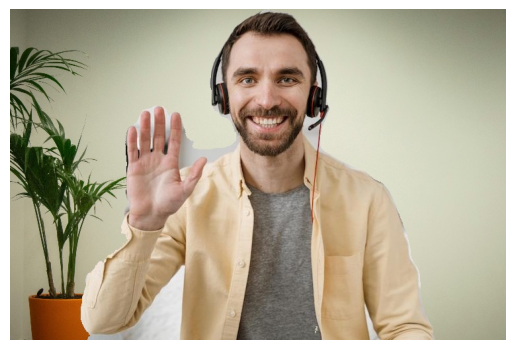

In [ ]:
plt.imshow(cv2.imread("Images/parallel_bg.jpg")[...,::-1]);
plt.axis('off');

### Đánh giá

#### Độ chính xác

Kết quả được feedforward hình qua mô hình UNET song song:



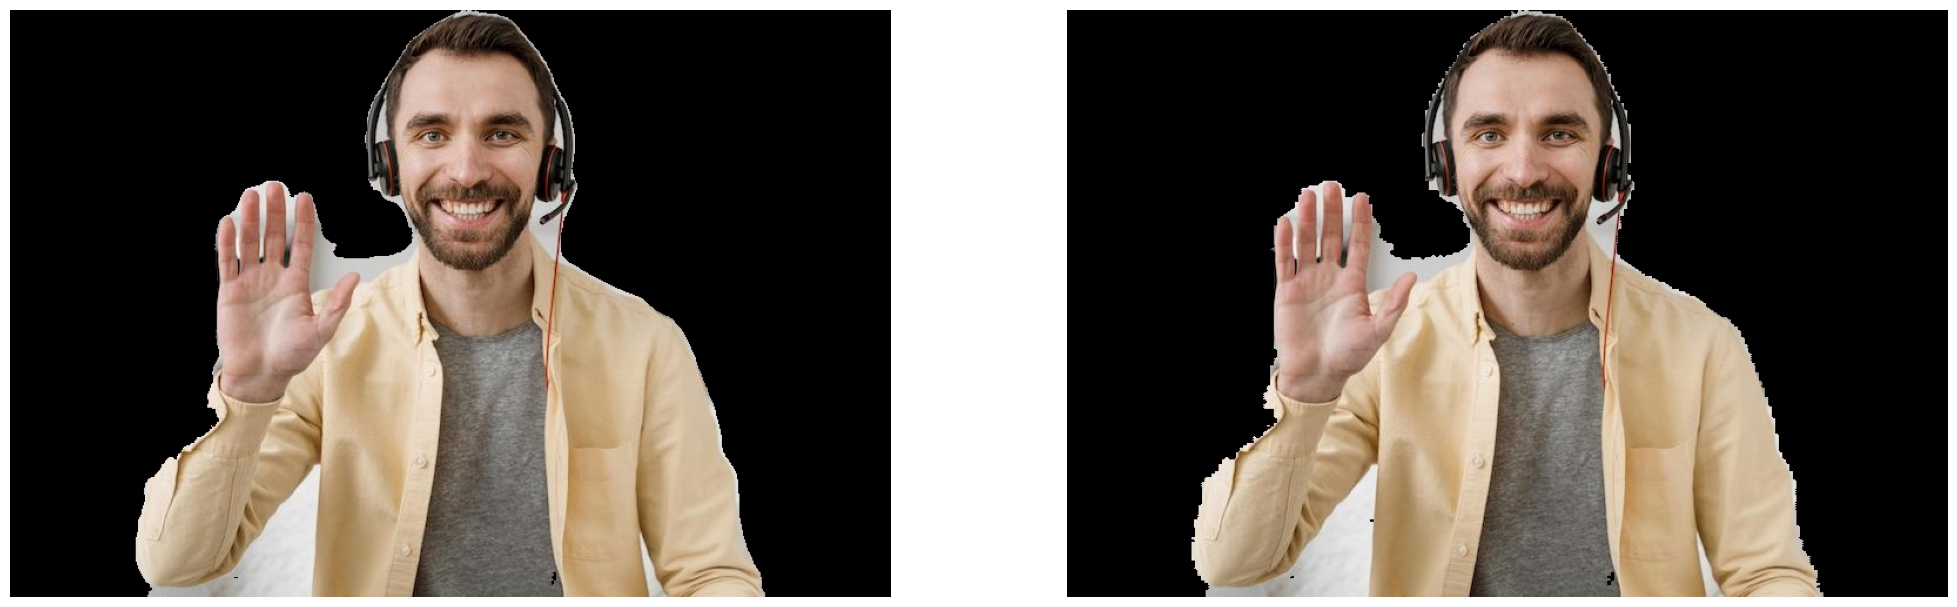

In [ ]:
list_images = [cv2.imread("Images/parallel.jpg")[...,::-1],
               cv2.imread("Images/unet.jpg")[...,::-1]]
fig = plt.figure(figsize=(25, 20))
fig.add_subplot(1, 2, 1)

# showing image
plt.imshow(list_images[0]);
plt.axis('off');

# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)

# showing image
plt.imshow(list_images[1]);
plt.axis('off');

In [ ]:
np.abs(list_images[0] - list_images[1]).mean()

np.float64(4.206027555555556)

##### **Nhận xét về hình ảnh đầu ra**

> Giá trị sai khác trung bình giữa hai ảnh đầu ra là khoảng **4.21**. Mặc dù con số này khác 0, cho thấy có sự khác biệt nhất định ở mức pixel, nhưng về mặt trực quan, hai ảnh vẫn trông khá giống nhau.

> Điều này có thể do sai khác chỉ nằm ở các chi tiết nhỏ hoặc nhiễu không đáng kể, nên mô hình tuần tự và U-Net vẫn có thể xem là cho kết quả đầu ra tương đương trong bối cảnh ứng dụng cụ thể.

#### Thời gian chạy

In [ ]:
pd.DataFrame(list(zip(func, time_compile_parallel, time_run_parallel, time_unet_parallel)),
               columns =['Name', 'Compile+Run(s)', 'Run(s)', 'Unet(s)']).sort_values(by=['Unet(s)'], ascending=False)

,Name,Compile+Run(s),Run(s),Unet(s)
3,Conv2D,0.355932,0.103490,9.191692
0,Relu,1.790382,0.087115,0.755108
4,Conv2D Transpose,0.362096,0.135691,0.556745
5,Batch Norm,0.163602,0.050624,0.540782
6,Concat,0.201088,0.113054,0.302365
2,Maxpool2D,0.408163,0.027216,0.198873
1,Sigmoid,0.262696,0.066629,0.110402


In [ ]:
print("Tổng thời gian chạy FFW song song: ", round(time_unet_parallel.sum(), 6), '(s)')

Tổng thời gian chạy FFW song song:  11.655967 (s)


##### **So sánh với chạy tuần tự**

In [ ]:
# pd.DataFrame(list(zip(func, time_compile, time_run, time_unet)),
#                columns =['Name', 'Compile+Run(s)', 'Run(s)', 'Unet(s)']).sort_values(by=['Unet(s)'], ascending=False)

In [ ]:
# print("Tổng thời gian chạy FFW tuần tự: ", round(time_unet.sum(), 6), '(s)')

##### **So sánh thời gian thực thi tuần tự và song song hóa**
* Tổng thời gian chạy tuần tự: **207.95 giây**

* Tổng thời gian chạy song song: **11.59 giây**
→ Thời gian giảm mạnh gần **18 lần** nhờ song song hóa.

* Các lớp Conv2D và Conv2D Transpose là thành phần tiêu tốn thời gian nhất trong mô hình tuần tự (chiếm hơn 95% tổng thời gian).

* Khi song song hóa, thời gian thực thi của các lớp này giảm rõ rệt, đặc biệt là Conv2D (từ ~194s còn ~9s).

**Kết luận:** Song song hóa giúp giảm đáng kể thời gian chạy của mô hình U-Net, đặc biệt hiệu quả ở các lớp tính toán nặng như Conv2D. Một số layer phụ (ReLU, Sigmoid...) có thể không được lợi quá nhiều, nhưng tổng thời gian vẫn giảm mạnh.

## Tối ưu song song tầng Convolution 2D

### Phiên bản chưa tối ưu

Đặc trưng:

* Dữ liệu đầu vào `(input_pad, weight, bias)` và đầu ra `(res)` đều nằm trên RAM (host).

* Khi kernel CUDA được gọi, Numba ngầm copy dữ liệu từ host sang GPU device và copy ngược kết quả về lại host sau khi chạy.

* Do các lần copy dữ liệu implicit (ngầm) này không được kiểm soát, dẫn đến không tối ưu hóa được chi phí truyền dữ liệu host và device, dẫn đến thời gian xử lý lâu hơn.

In [ ]:
before = np.array(x)
after = np.array(layer_outs[1])
weight = model.layers[1].weights[0].numpy()
bias = model.layers[1].weights[1].numpy()
np.save('input.npy', before)
np.save('weight.npy', weight)
np.save('bias.npy', bias)

In [ ]:
%%writefile parallel_conv2d.py

import numpy as np
import cv2
import math
import time
from numba import jit, prange, config, cuda, float32
import pandas as pd

# !uv pip install -q --system numba-cuda==0.4.0
from numba import config
config.CUDA_ENABLE_PYNVJITLINK = 1

# BLOCK_SIZE = (8, 8, 8)
BLOCK_SIZE = (4, 4, 4)

def check(func, *arg):
    start = time.time()
    result = func(*arg)
    end = time.time()
    t = end - start
    return result, t

# Conv2D
@cuda.jit(debug=True)
def conv2D_parallel(input, wei, bias, stride,output):
    x, y, z = cuda.grid(3)

    if x < output.shape[1] and y < output.shape[2] and z < output.shape[3]:
        k = wei.shape[1]
        c_in = input.shape[3]

        total=0.
        for c_i in range(c_in):
            kt=0.
            for k_x in range(k):
                for k_y in range(k):
                    pos1 = k_x + x * stride
                    pos2 = k_y + y * stride
                    kt += wei[k_x, k_y, c_i, z] * input[0, pos1, pos2, c_i]
            total += kt

        output[0, x, y, z] = total + bias[z]

def conv2D_host(before, weight, bias ,padding ="same", stride = 1):
  w_in, h_in, c_in = before.shape[1:4]

  k = weight.shape[1]
  pad = k // 2
  w_out = (w_in + 2 * pad - k)//stride + 1
  h_out = (h_in + 2 * pad - k)//stride + 1
  c_out = bias.shape[0]

  input_pad = np.zeros((1, w_in + 2 * pad, h_in + 2 * pad, c_in))
  input_pad[0, pad:(w_in + pad), pad:(h_in + pad), :] = before

  res = np.zeros((1, w_out, h_out, c_out))
  GRID_SIZE = (math.ceil(res.shape[1]/BLOCK_SIZE[0]),
              math.ceil(res.shape[2]/BLOCK_SIZE[1]),
              math.ceil(res.shape[3]/BLOCK_SIZE[2]))
  _=conv2D_parallel[GRID_SIZE, BLOCK_SIZE]( input_pad,  weight, bias, stride,res)
  return res

before = np.load('input.npy')
weight = np.load('weight.npy')
bias = np.load('bias.npy')

# interpreter -> cached
res,t0 = check(conv2D_host,before[:1,:1], weight[:1,:1], bias[:1])

res,t0 = check(conv2D_host,before, weight, bias)
print(f'Processing time: {t0} s')
np.save('res.npy', res)
np.save('t0.npy', round(t0,3))

Overwriting parallel_conv2d.py


In [ ]:
!nvprof --print-gpu-trace python parallel_conv2d.py

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/decorators.py:82: NumbaInvalidConfigWarning: debug=True with opt=True is not supported by CUDA. This may result in a crash - set debug=False or opt=False.
  warn(NumbaInvalidConfigWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/dispatcher.py:605: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
==16692== NVPROF is profiling process 16692, command: python3 parallel_conv2d.py
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
Processing time: 0.10222911834716797 s
==16692== Profiling application: python3 parallel_conv2d.py
==16692== Profiling result:
   Start  Duration            Grid Size      Block Size     Regs*    SSMem*    DSMem*     

In [ ]:
res = np.load('res.npy')
print("Checking difference",np.abs(res-after).mean())

Checking difference 1.0080040055732413e-08


### Phiên bản 1

#### Phân tích & Thiết kế

Dựa trên bảng đánh giá tốc độ khi đã song song, nhóm sẽ thực hiện tối ưu hóa song song cho layer Conv2D.

Vì numba sẽ tự động copy từ host sang device và ngược lại với tất cả dữ liệu được truyền vào hàm kernel, nên có thể bị tăng thời gian thực thi do copy thừa. \
Convolution2D:

*   `cuda.to_device()` các biến: input, weight, bias. Dùng để copy dữ liệu từ RAM lên GPU trước khi gọi kernel.
*  `cuda.device_array()`: tạo mảng đầu ra trực tiếp trên GPU.
*   `array.copy_to_host()` các biến: res. Sau khi tính toán xong, chỉ cần copy kết quả một lần duy nhất về host.

#### Điểm tối ưu hơn so với phiên bản trước

* Giảm số lần truyền dữ liệu không cần thiết giữa CPU và GPU
* Tăng tốc độ thực thi tổng thể đặc biệt với mảng lớn
* Có thể mở rộng tiếp (pipeline nhiều layer) mà giữ dữ liệu trên GPU để tính các bước tiếp theo


#### Cài đặt

In [ ]:
%%writefile parallel_optimized1_conv2d.py
import numpy as np
import cv2
import math
import time
from numba import jit, prange, config, cuda, float32
import pandas as pd

from numba import config
config.CUDA_ENABLE_PYNVJITLINK = 1


BLOCK_SIZE = (4, 4, 4)

# Conv2D
@cuda.jit(debug=True)
def conv2D_parallel(input, wei, bias, stride,output):
    x, y, z = cuda.grid(3)

    if x < output.shape[1] and y < output.shape[2] and z < output.shape[3]:
        k = wei.shape[1]
        c_in = input.shape[3]

        total=0.
        for c_i in range(c_in):
            kt=0.
            for k_x in range(k):
                for k_y in range(k):
                    pos1 = k_x + x * stride
                    pos2 = k_y + y * stride
                    kt += wei[k_x, k_y, c_i, z] * input[0, pos1, pos2, c_i]
            total += kt

        output[0, x, y, z] = total + bias[z]

def conv2D_host(before, weight, bias ,padding ="same", stride = 1):
  w_in, h_in, c_in = before.shape[1:4]

  k = weight.shape[1]
  pad = k // 2
  w_out = (w_in + 2 * pad - k)//stride + 1
  h_out = (h_in + 2 * pad - k)//stride + 1
  c_out = bias.shape[0]

  input_pad = np.zeros((1, w_in + 2 * pad, h_in + 2 * pad, c_in))
  input_pad[0, pad:(w_in + pad), pad:(h_in + pad), :] = before

  # Copy to device
  d_input_pad = cuda.to_device(input_pad)
  d_weight = cuda.to_device(weight)
  d_bias = cuda.to_device(bias)
  d_res = cuda.device_array((1, w_out, h_out, c_out), dtype = float)
  GRID_SIZE = (math.ceil(d_res.shape[1]/BLOCK_SIZE[0]),
              math.ceil(d_res.shape[2]/BLOCK_SIZE[1]),
              math.ceil(d_res.shape[3]/BLOCK_SIZE[2]))

  _=conv2D_parallel[GRID_SIZE, BLOCK_SIZE]( d_input_pad,  d_weight, d_bias, stride, d_res)
  # Copy to host
  res = d_res.copy_to_host()
  return res

def check(func, *arg):
    start = time.time()
    result = func(*arg)
    end = time.time()
    t = end - start
    return result, t

before = np.load('input.npy')
weight = np.load('weight.npy')
bias = np.load('bias.npy')

# interpreter -> cached
res,t1 = check(conv2D_host,before[:1,:1], weight[:1,:1], bias[:1])

res,t1 = check(conv2D_host,before, weight, bias)
print(f'Processing time: {t1} s')
np.save('res_opt1.npy', res)
np.save('t1.npy', round(t1,3))


Overwriting parallel_optimized1_conv2d.py


#### Đánh giá

**Thời gian chạy**

In [ ]:
!nvprof --print-gpu-trace python parallel_optimized1_conv2d.py

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/decorators.py:82: NumbaInvalidConfigWarning: debug=True with opt=True is not supported by CUDA. This may result in a crash - set debug=False or opt=False.
  warn(NumbaInvalidConfigWarning(msg))
==16716== NVPROF is profiling process 16716, command: python3 parallel_optimized1_conv2d.py
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/dispatcher.py:605: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
Processing time: 0.07001590728759766 s
==16716== Profiling application: python3 parallel_optimized1_conv2d.py
==16716== Profiling result:
   Start  Duration            Grid Size      Block Size     Regs*    SSMem*    DSMem*      Size  Throughput  SrcMemType  DstMemType           Device   Context    Stream  Name
300.50ms  1.5680us                    -               -         -         -         -  6.0000KB  3.6493GB/s    Pageab

**Độ chính xác**

In [ ]:
res = np.load('res_opt1.npy')
print("Checking difference",np.abs(res-after).mean())

Checking difference 1.0080040055732413e-08


### Phiên bản 2

#### Phân tích & Thiết kế

Dựa trên thời gian chạy gpu ở phiên bản 1, nhóm nhận thấy các bước chiếm nhiều thời gian nhất:

| STT | Bước                         | Thời gian     | Ghi chú                              |
| --- | ---------------------------- | ------------- | ------------------------------------ |
| 1   | Kernel `conv2D_parallel`     | **52.874 ms** | Chiếm thời gian lớn nhất – tính toán |
| 2   | Device → Host (copy kết quả) | **12.421 ms** | Truyền dữ liệu lớn 32MB về CPU       |
| 3   | Host → Device (copy đầu vào) | **0.167 ms**  | Truyền input 1.5MB lên GPU           |


**$\to$ Nhóm sẽ thực hiện tối ưu với 2 cách.**

(1) Thực hiện copy input và output thủ công

(2) Tối ưu hàm kernel để giảm thời gian thực thi tính toán:

* **Giảm số vòng lặp**: chỉ dùng 3 vòng lặp thay vì 4 → giảm chi phí tính toán.
* **Truy cập bộ nhớ hiệu quả**: Truy cập `input` và `weight` theo thứ tự liên tiếp trong bộ nhớ → giúp coalesced memory access, giảm độ trễ truy cập.
* **Tối giản biến trung gian**: Gộp toàn bộ tích lũy vào biến `acc` duy nhất, thay vì dùng nhiều biến như `kt` và `total` trong v1 → giảm truy cập bộ nhớ không cần thiết.







#### Cài đặt

In [ ]:
%%writefile parallel_optimized2_conv2d.py
import numpy as np
import cv2
import math
import time
from numba import jit, prange, config, cuda, float32
import pandas as pd

from numba import config
config.CUDA_ENABLE_PYNVJITLINK = 1

BLOCK_SIZE = (4,4,4)

@cuda.jit
def conv2D_parallel(input, output, weight, bias, stride):
    x, y, z = cuda.grid(3)
    if x < output.shape[1] and y < output.shape[2] and z < output.shape[3]:
        acc = 0.0
        for i in range(weight.shape[0]):
            for j in range(weight.shape[1]):
                for c in range(input.shape[3]):
                    acc += input[0, x * stride + i, y * stride + j, c] * weight[i, j, c, z]
        acc += bias[z]
        output[0, x, y, z] = acc


def conv2D_host(input, weight, bias, padding='same', stride=1):
    n, w_in, h_in, c_in = input.shape
    w_k, h_k, _, c_out = weight.shape

    # Tính toán padding nếu padding='same'
    if padding == 'same':
        pad_w = w_k // 2
        pad_h = h_k // 2
    elif isinstance(padding, int):
        pad_w = pad_h = padding
    else:
        raise ValueError("padding must be 'same' or an integer")

    # Tính output shape
    w_out = (w_in + 2 * pad_w - w_k) // stride + 1
    h_out = (h_in + 2 * pad_h - h_k) // stride + 1

    # Padding input
    input_pad = np.pad(input, ((0, 0), (pad_w, pad_w), (pad_h, pad_h), (0, 0)), mode='constant')

    # Copy sang device
    d_input_pad = cuda.to_device(input_pad)
    d_weight = cuda.to_device(weight)
    d_bias = cuda.to_device(bias)
    d_res = cuda.device_array((n, w_out, h_out, c_out), dtype=np.float32)

    blockdim = (4, 4, 4)
    griddim = (
        math.ceil(w_out / blockdim[0]),
        math.ceil(h_out / blockdim[1]),
        math.ceil(c_out / blockdim[2])
    )

    # Gọi kernel
    conv2D_parallel[griddim, blockdim](d_input_pad, d_res, d_weight, d_bias, stride)

    return d_res.copy_to_host()


def check(func, *arg):
    start = time.time()
    result = func(*arg)
    end = time.time()
    t = end - start
    return result, t

before = np.load('input.npy')
weight = np.load('weight.npy')
bias = np.load('bias.npy')

# interpreter -> cached
res,t2 = check(conv2D_host,before[:1,:1], weight[:1,:1], bias[:1])

res,t2 = check(conv2D_host,before, weight, bias)
print(f'Processing time: {t2} s')
np.save('res_opt2.npy', res)
np.save('t2.npy', round(t2,3))

Overwriting parallel_optimized2_conv2d.py


#### Đánh giá

**Thời gian chạy**

In [ ]:
!nvprof --print-gpu-trace python parallel_optimized2_conv2d.py

==16740== NVPROF is profiling process 16740, command: python3 parallel_optimized2_conv2d.py
Processing time: 0.014230012893676758 s
==16740== Profiling application: python3 parallel_optimized2_conv2d.py
==16740== Profiling result:
   Start  Duration            Grid Size      Block Size     Regs*    SSMem*    DSMem*      Size  Throughput  SrcMemType  DstMemType           Device   Context    Stream  Name
302.10ms  1.4080us                    -               -         -         -         -  3.0000KB  2.0320GB/s    Pageable      Device     Tesla T4 (0)         1         7  [CUDA memcpy HtoD]
302.43ms     768ns                    -               -         -         -         -      768B  953.67MB/s    Pageable      Device     Tesla T4 (0)         1         7  [CUDA memcpy HtoD]
302.73ms     672ns                    -               -         -         -         -        4B  5.6766MB/s    Pageable      Device     Tesla T4 (0)         1         7  [CUDA memcpy HtoD]
596.17ms  20.255us         

**Độ chính xác**

In [ ]:
res = np.load('res_opt2.npy')
print("Checking difference",np.abs(res-after).mean())

Checking difference 1.1018155e-08


**So sánh**

In [ ]:
t0 = np.load('t0.npy')
t1 = np.load('t1.npy')
t2 = np.load('t2.npy')

In [ ]:
df = pd.DataFrame({
    'Phiên bản': ['Chưa tối ưu', 'Tối ưu 1', 'Tối ưu 2'],
    'Thời gian chạy (s)': [t0, t1, t2]
})
df

,Phiên bản,Thời gian chạy (s)
0,Chưa tối ưu,0.102
1,Tối ưu 1,0.07
2,Tối ưu 2,0.016


In [ ]:
df_summary = pd.read_csv('df_summary.csv')
df_summary

,Phiên bản,Run(s),Unet(s),Total
0,v0,0.103490,9.191692,11.655967
1,v1,0.070788,9.001145,11.123668
2,v2,0.012786,2.251734,4.008429
